<a href="https://colab.research.google.com/github/rashmikb26/BoomBike/blob/main/May%2018%20notebook_cement_sales_and_demand_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Cement Sales & Demand Prediction 89

In [ ]:
#importing important Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline


In [ ]:
#loading the data and creating column 't'
import os

#1) From Github (Files < 25MB)

#filename = "https://github.com/rashmikb26/CementSalesForecasting/blob/main/89cement%20data%20.csv"
# provide the raw data url
filename ="https://raw.githubusercontent.com/rashmikb26/CementSalesForecasting/main/89cement%20data%20.csv?token=GHSAT0AAAAAACSFEYOKXP7JL2UXU7F6UIFSZSDQCHA"
url = filename
df1 = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe

cement = pd.read_csv(filename)
cement = cement.iloc[:155, :8]



# New Section

In [ ]:
cement['t'] =np.arange(1,156)
cement.tail(10)

Month  Production  Sales   demand  population        gdp  disbusment  \
145  Feb-22       848.0   836.0   853.0       140.8  313161.38   217568.62   
146  Mar-22       531.0   514.0   625.0       140.9  288039.68   219634.66   
147  Apr-22       487.0   477.0   495.0       141.0  262917.98   221700.71   
148  May-22       531.0   514.0   596.0       141.1  261644.65   223766.76   
149  Jun-22       586.0   574.0   685.0       141.2  260371.32   225832.80   
150  Jul-22       434.0   430.0   547.0       141.3  259097.99   227898.85   
151  Aug-22       422.0   419.0   526.0       141.4  257824.66   229964.90   
152  Sep-22       433.0   431.0   502.0       141.5  256551.33   232030.94   
153  Oct-22       453.0   451.0   625.0       141.6  255278.00   234096.99   
154  Nov-22       903.0   895.0   900.0       141.7  254004.67   236163.04   

     interestrate    t  
145          8.14  146  
146          8.18  147  
147          8.23  148  
148          8.27  149  
149          8.31  150  
150          8.35  151  
151          8.39  152  
152          8.43  153  
153          8.48  154  
154          8.60  155

In [ ]:
# Interchanging position of feature t
cement = cement.iloc[:, [0,8,1,2,3,4,5,6,7]]
cement.head(10)

Month   t  Production  Sales   demand  population       gdp  disbusment  \
0  Jan-10   1       347.0   322.0   346.0       122.4  182277.0    60314.00   
1  Feb-10   2       306.0   285.0   338.0       122.5  181018.0    61213.92   
2  Mar-10   3       236.0   245.0   276.0       122.6  179759.0    62113.83   
3  Apr-10   4       234.0   212.0   245.0       122.8  178500.0    63013.75   
4  May-10   5       296.0   289.0   312.0       122.9  177354.0    63913.67   
5  Jun-10   6       224.0   212.0   215.0       123.1  176208.0    64813.58   
6  Jul-10   7       184.0   174.0   181.0       123.2  175062.0    65713.50   
7  Aug-10   8       193.0   200.0   216.0       123.3  177418.0    66613.42   
8  Sep-10   9       169.0   152.0   178.0       123.5  179774.0    67513.33   
9  Oct-10  10       200.0   214.0   215.0       123.6  182130.0    68413.25   

   interestrate  
0         10.25  
1         10.33  
2         10.42  
3         10.50  
4         10.58  
5         10.67  
6         10.75  
7         10.83  
8         10.92  
9         11.00

# AutoEDA

In [ ]:
# performing autoEDA
!pip install ydata-profiling
!pip install pydantic-settings

from pydantic_settings import BaseSettings
from ydata_profiling import ProfileReport

# Generate the data profiling report
report = ProfileReport(cement, title='Cement Sales Data')
report.to_file("Cement_report.html")
report  # to display the report

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 12.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=b2e30f347dd82f2456a0a5e808031d51fdcfd932877af28cb1baba856ac62f46
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Correlation matrix

In [ ]:
# checking correlation between each features
from datetime import datetime
cement.head(10)
#cement['Month'] = datetime(cement['Month'])
#cement['Month'] = cement['Month'].strftime("%m")


#date_format = '%Y-%m-%d'
#
#cement['Month'] = datetime.strptime(cement['Month'] , date_format)
#cement.head(10)
#cement['Month'] = cement.to_datetime(date_string)

cement['Month'] = cement.Month.to_datetime(cement['Month'],format='%d-%m-%Y')


#cement['Month'].strftime("%b")

#cement['Month']= cement['Month'].astype(float)
#cement.corr()

AttributeError: 'Series' object has no attribute 'to_datetime'

# Pairplot

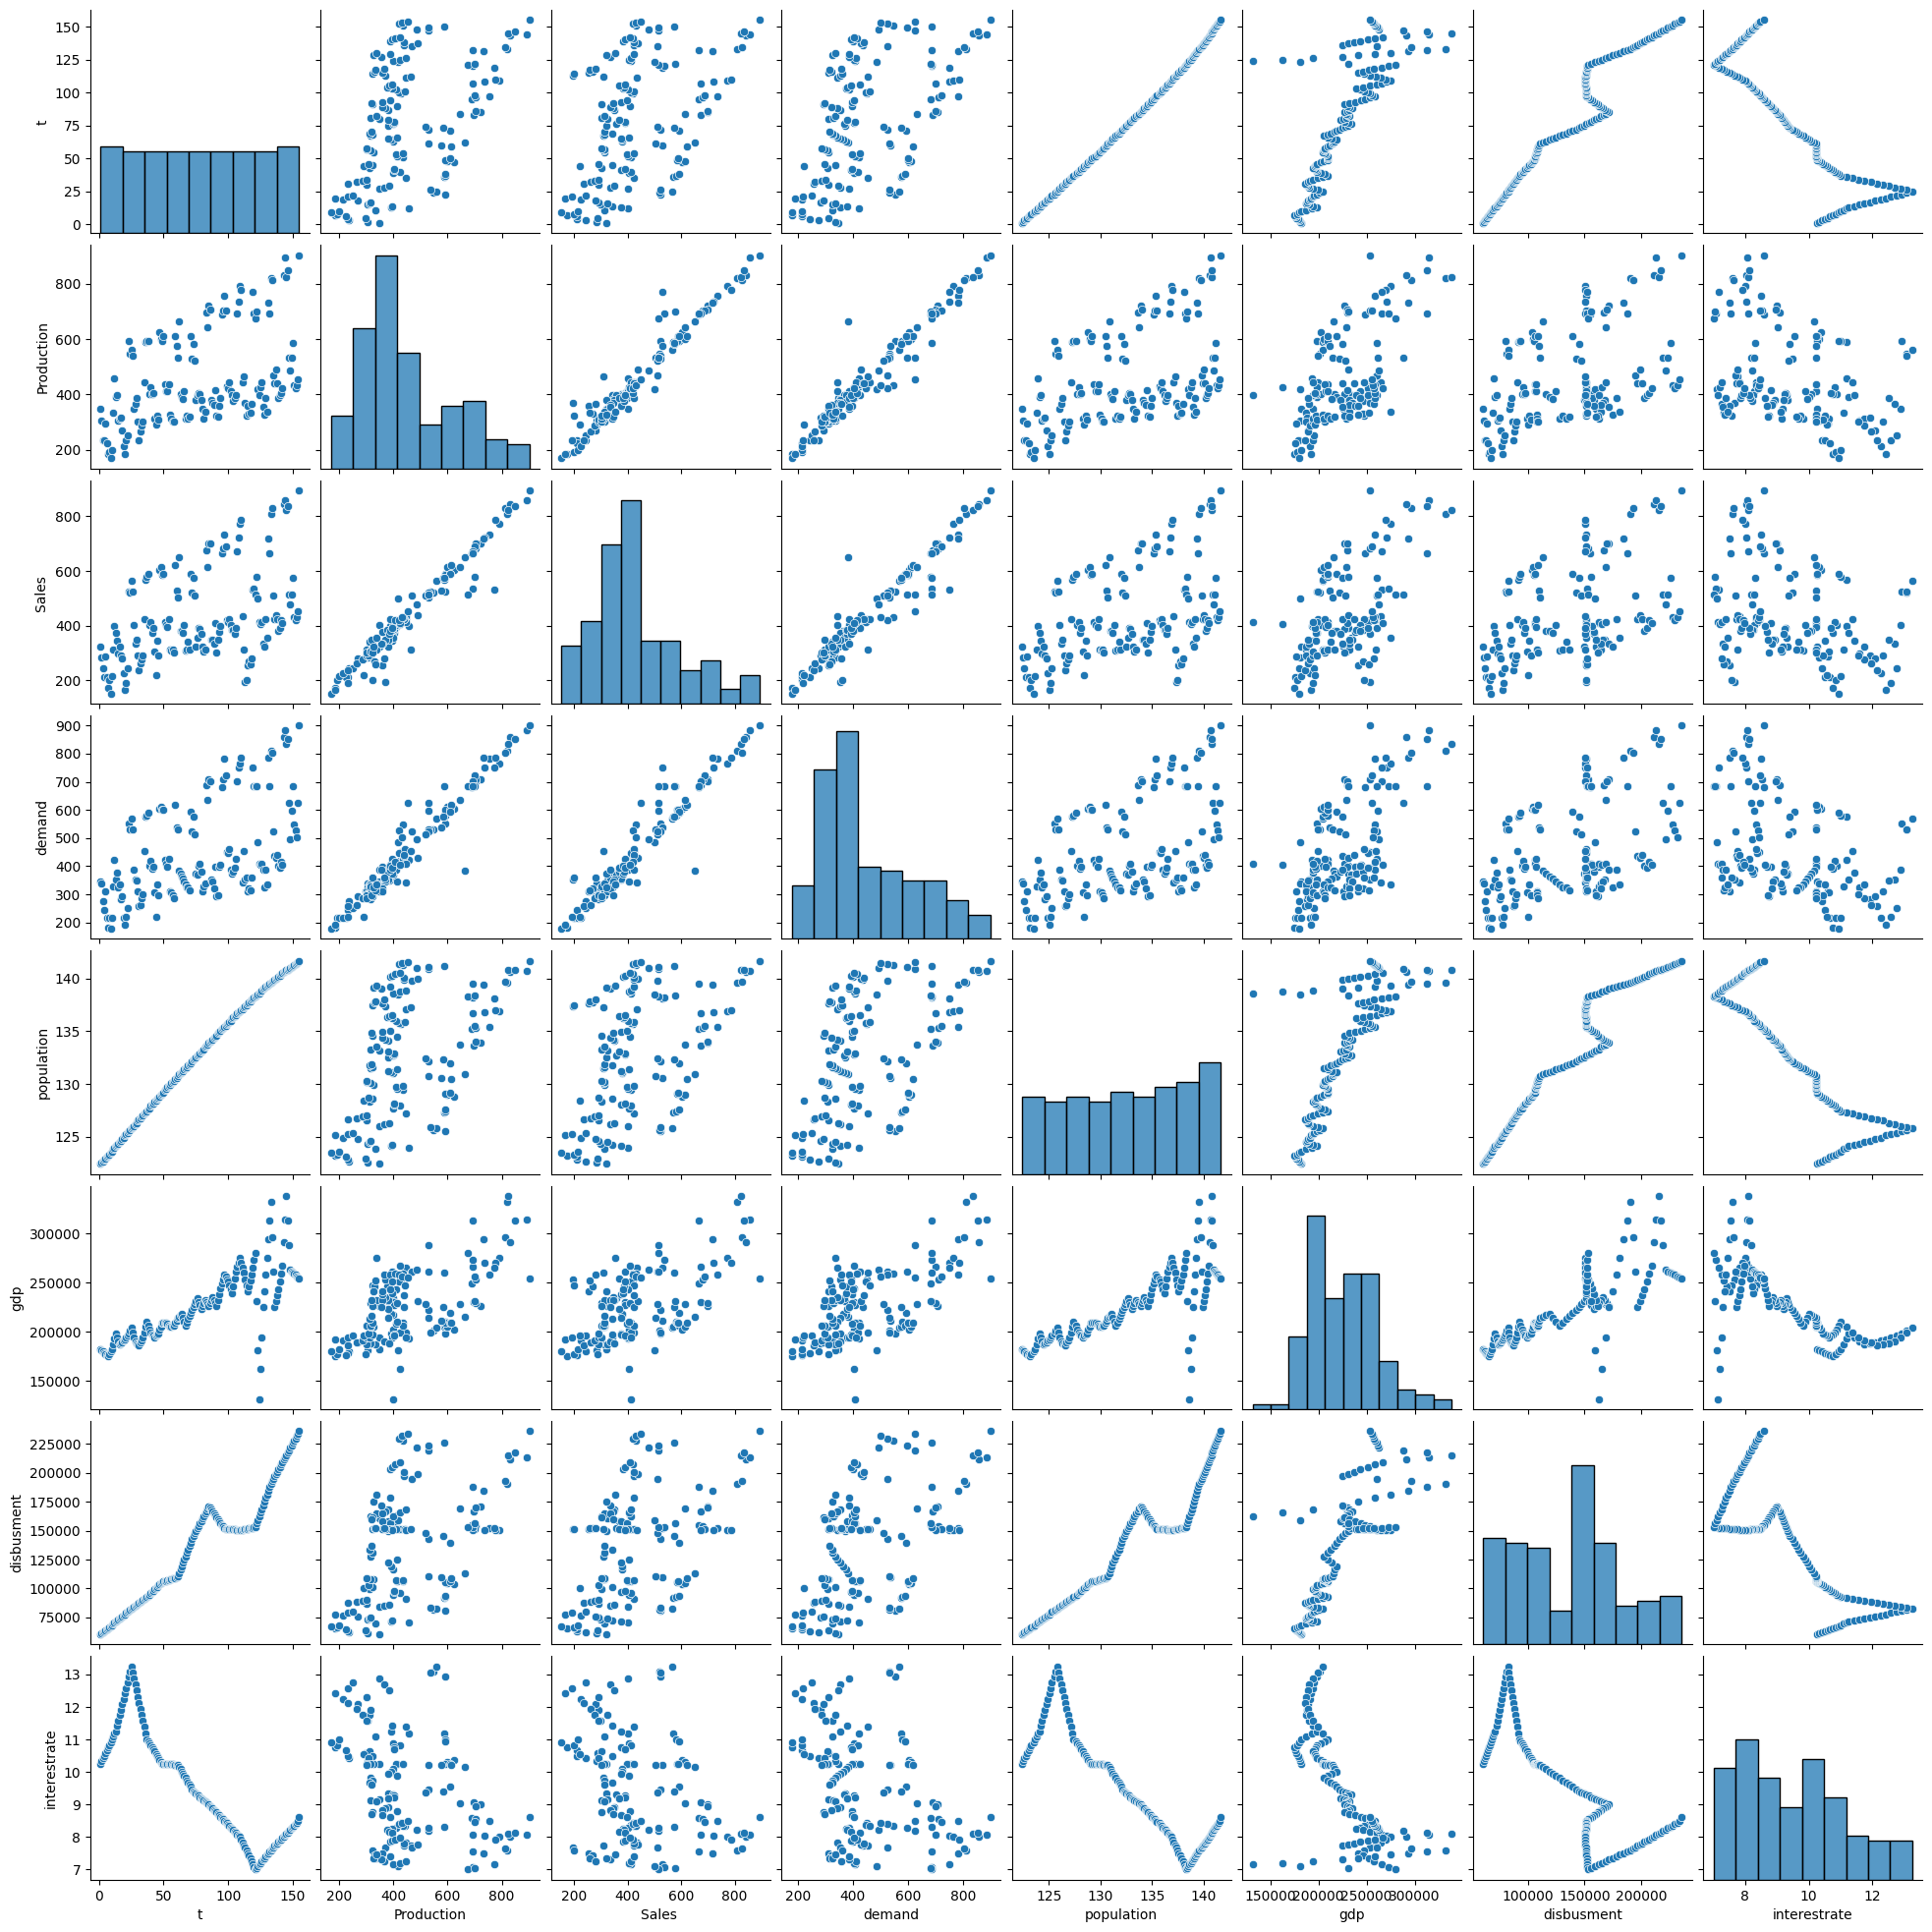

In [ ]:
sns.pairplot(cement)

In [ ]:
cement.columns

Index(['Month', 't', 'Production', 'Sales ', 'demand', 'population', 'gdp',
       'disbusment', 'interestrate'],
      dtype='object')

# Time Plots

<Axes: xlabel='t', ylabel='Sales '>

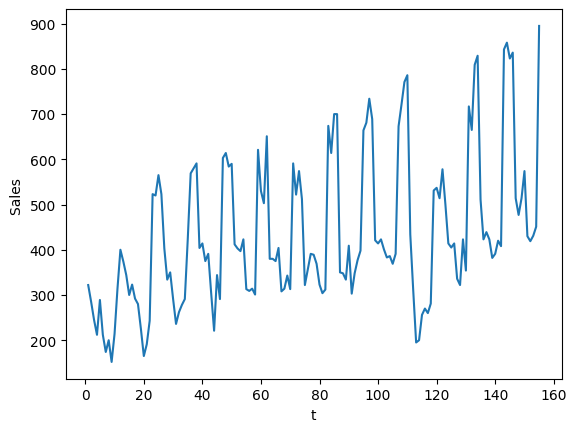

In [ ]:
# time plot is basically a line plot showing the evolution of the time series over time.

sns.lineplot(data = cement,x='t',y='Sales ')


<Axes: xlabel='t', ylabel='Production'>

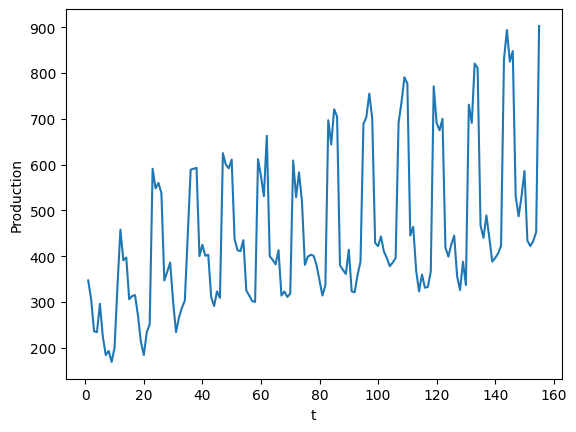

In [ ]:
sns.lineplot(data= cement,x='t',y='Production')

<Axes: xlabel='t', ylabel='demand'>

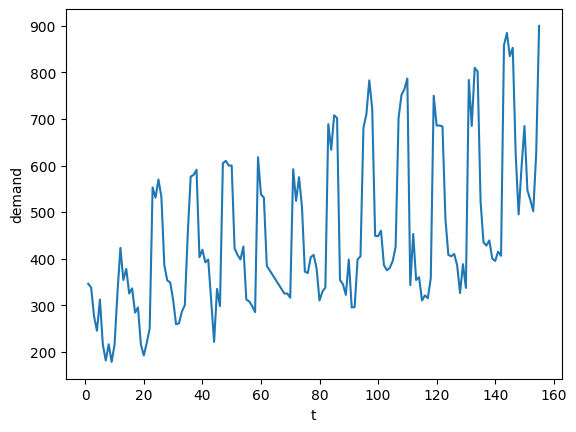

In [ ]:
sns.lineplot(data= cement,x='t',y='demand',)

<Axes: xlabel='t', ylabel='population'>

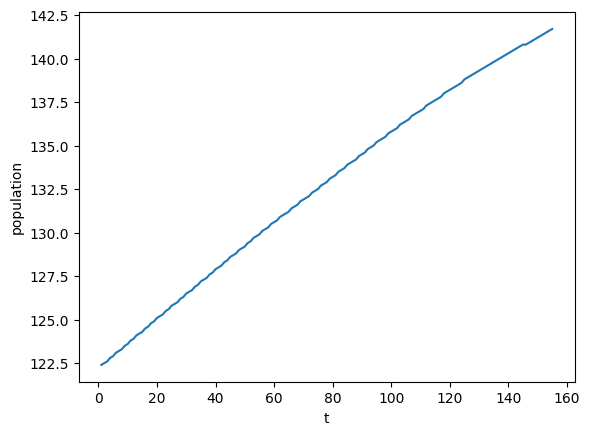

In [ ]:
sns.lineplot(data= cement,x='t',y='population')

<Axes: xlabel='t', ylabel='gdp'>

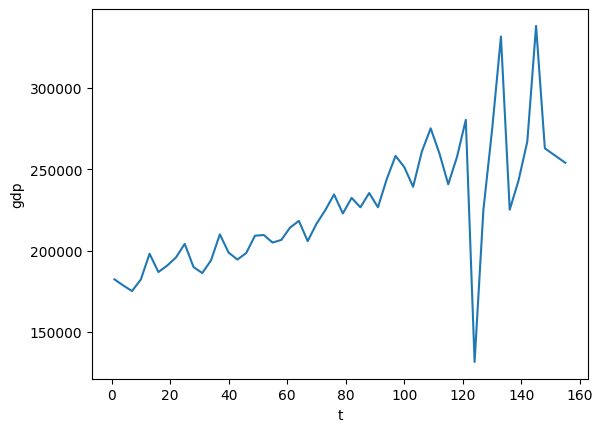

In [ ]:
sns.lineplot(data= cement,x='t',y='gdp')

<Axes: xlabel='t', ylabel='disbusment'>

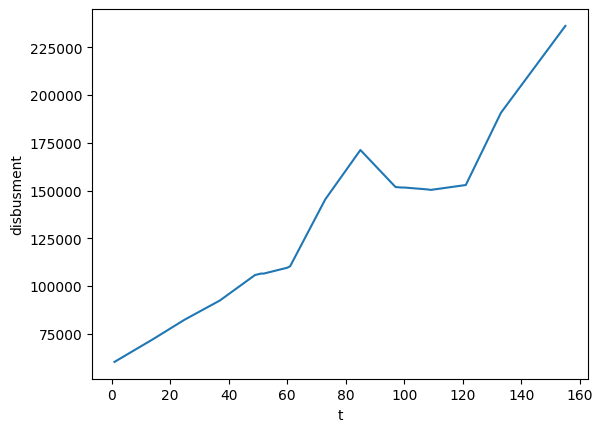

In [ ]:
sns.lineplot(data= cement,x='t',y= 'disbusment')

<Axes: xlabel='t', ylabel='interestrate'>

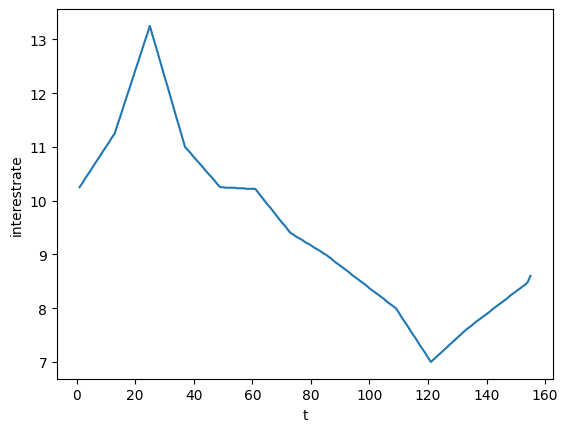

In [ ]:
sns.lineplot(data= cement,x='t',y= 'interestrate')

In [ ]:
cement.columns

Index(['Month', 't', 'Production', 'Sales ', 'demand', 'population', 'gdp',
       'disbusment', 'interestrate'],
      dtype='object')

<Axes: ylabel='Sales '>

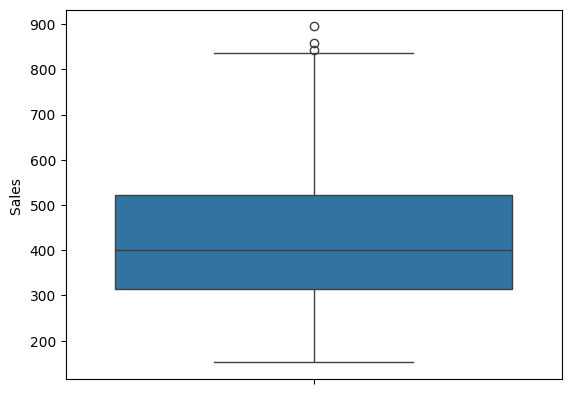

In [ ]:
# checking outliers

sns.boxplot(cement['Sales '])


In [ ]:
!pip install feature_engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.3/344.3 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 41.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.2 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 2.2.2 which is incompatible.


<Axes: ylabel='Sales '>

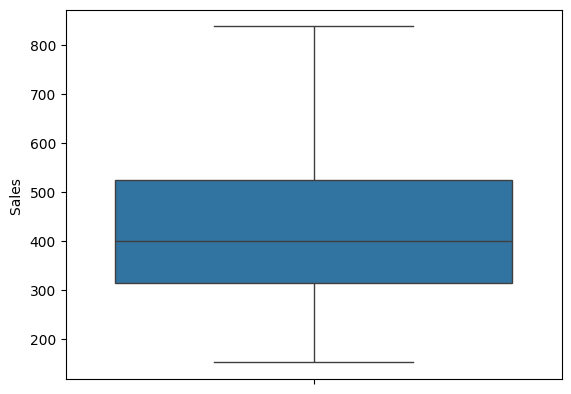

In [ ]:
#outliers are present in this feature so need to treat them
#lets use Winsorization

from feature_engine.outliers import Winsorizer
winsor = Winsorizer(capping_method='iqr',
                   fold= 1.5,
                   tail= 'both',
                   variables=['Sales '])
cement['Sales '] = winsor.fit_transform(cement[['Sales ']])
sns.boxplot(cement['Sales '])

<Axes: ylabel='demand'>

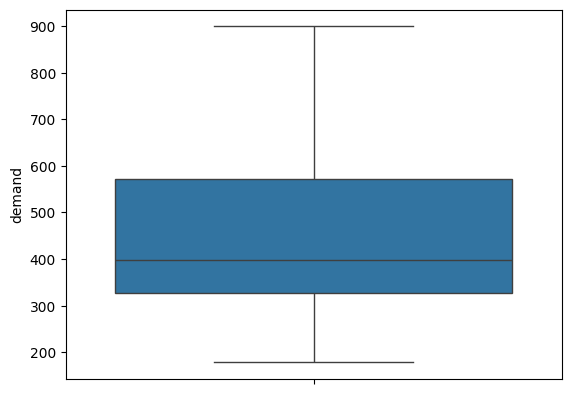

In [ ]:
sns.boxplot(cement['demand'])

<Axes: ylabel='Production'>

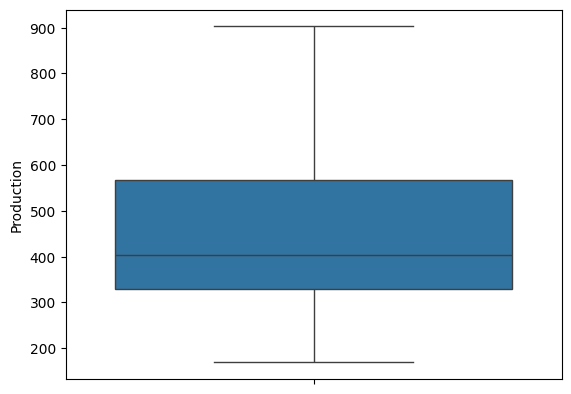

In [ ]:
sns.boxplot(cement['Production'])

<Axes: ylabel='population'>

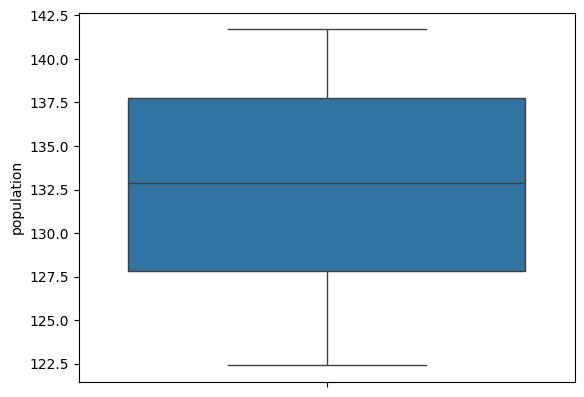

In [ ]:
sns.boxplot(cement['population'])

<Axes: ylabel='gdp'>

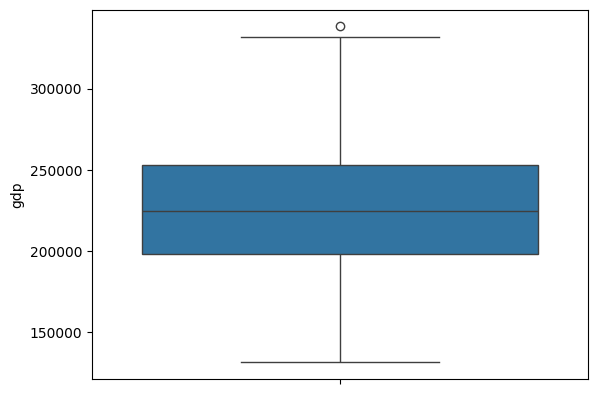

In [ ]:
sns.boxplot(cement['gdp'])

<Axes: ylabel='gdp'>

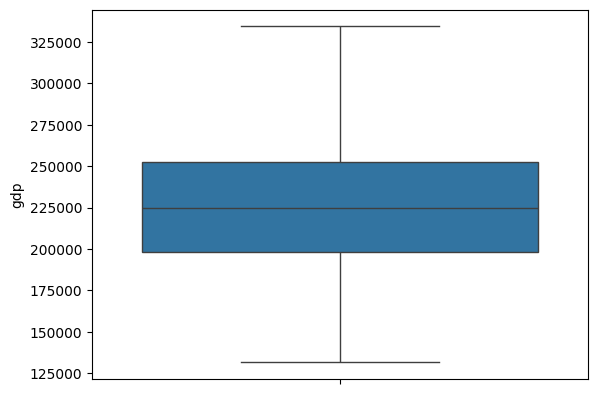

In [ ]:
from feature_engine.outliers import Winsorizer
winsor = Winsorizer(capping_method='iqr',
                   fold= 1.5,
                   tail= 'both',
                   variables=['gdp'])
cement['gdp'] = winsor.fit_transform(cement[['gdp']])
sns.boxplot(cement['gdp'])

<Axes: ylabel='disbusment'>

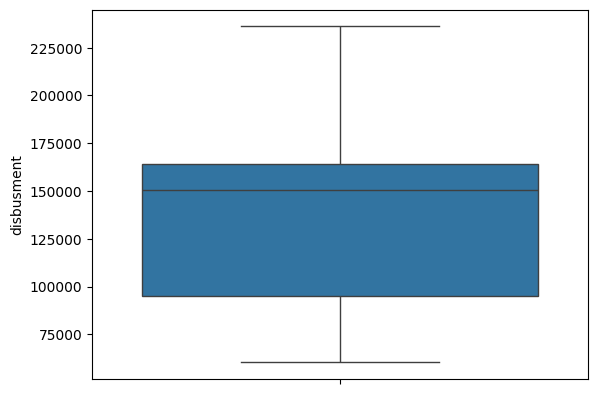

In [ ]:
sns.boxplot(cement['disbusment'])

<Axes: ylabel='interestrate'>

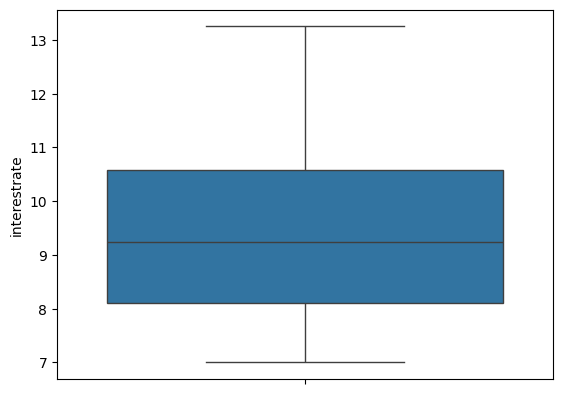

In [ ]:
sns.boxplot(cement['interestrate'])

<Axes: xlabel='t', ylabel='gdp'>

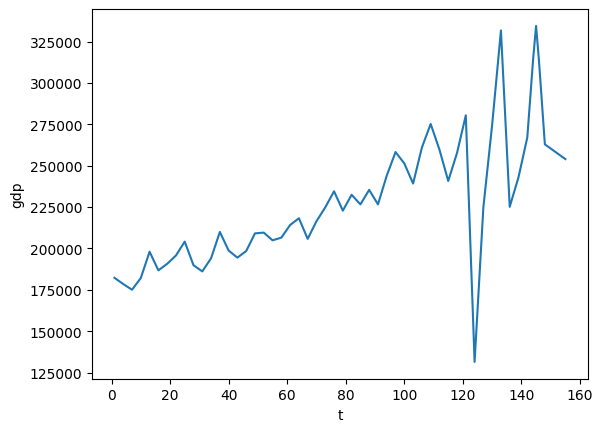

In [ ]:
sns.lineplot(data=cement,x='t',y='gdp')

# Forecasting for Sales

# Linear Model

0            NaN
1            NaN
2      261.87500
3      248.62500
4      230.62500
         ...    
150    473.87500
151    448.12500
152    483.65625
153          NaN
154          NaN
Name: trend, Length: 155, dtype: float64
0       2.047081
1       6.294613
2       2.031456
3     -10.373150
4       2.047081
         ...    
150     2.031456
151   -10.373150
152     2.047081
153     6.294613
154     2.031456
Name: seasonal, Length: 155, dtype: float64
0            NaN
1            NaN
2     -18.906456
3     -26.251850
4      56.327919
         ...    
150   -45.906456
151   -18.751850
152   -54.703331
153          NaN
154          NaN
Name: resid, Length: 155, dtype: float64
0      322.00
1      285.00
2      245.00
3      212.00
4      289.00
        ...  
150    430.00
151    419.00
152    431.00
153    451.00
154    837.25
Name: Sales , Length: 155, dtype: float64


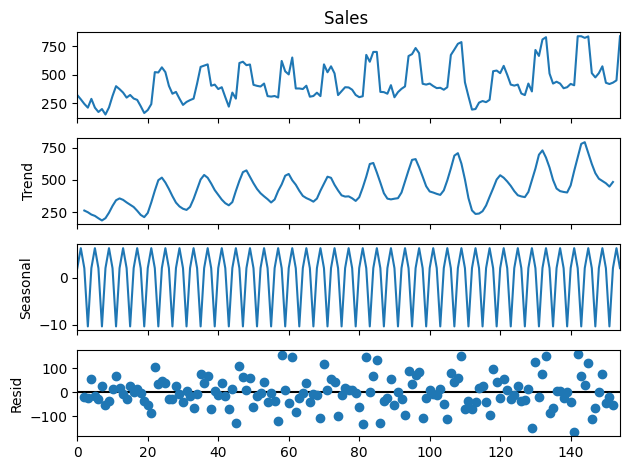

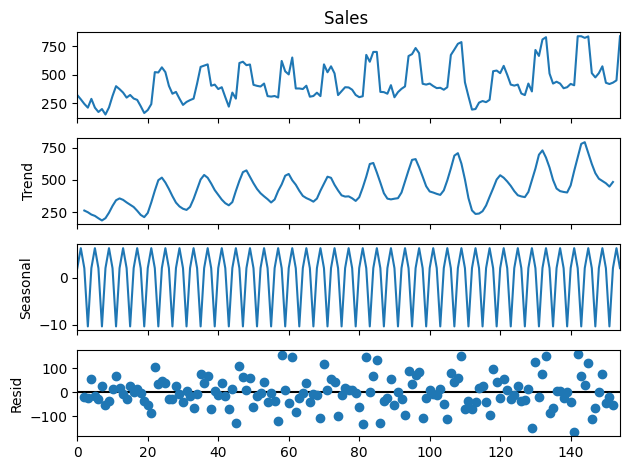

In [ ]:
# breaking up a time series into components, most notably: a trend component, a seasonal component, and a residual component

from statsmodels.tsa.seasonal import seasonal_decompose

decompose_ts_add = seasonal_decompose(cement['Sales '], model = "additive", period = 4)
print(decompose_ts_add.trend)
print(decompose_ts_add.seasonal)
print(decompose_ts_add.resid)
print(decompose_ts_add.observed)
decompose_ts_add.plot()

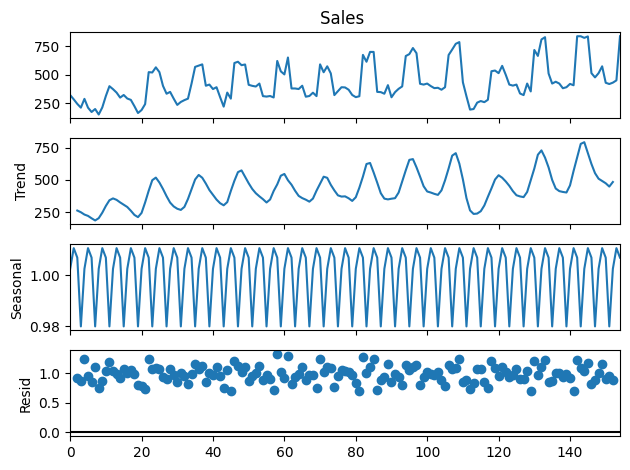

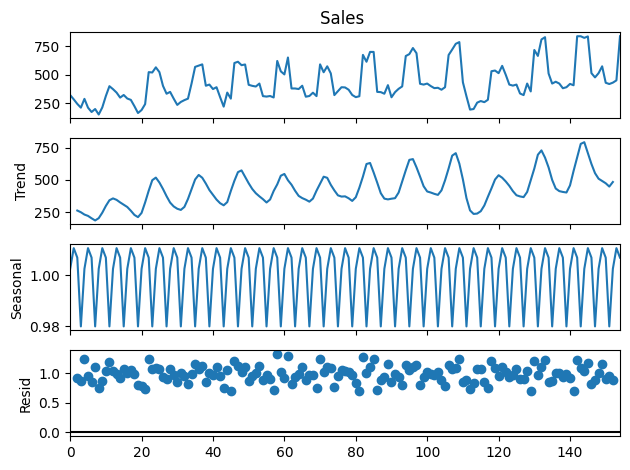

In [ ]:
decompose_ts_mul = seasonal_decompose(cement['Sales '], model = "multiplicative", period = 4)
decompose_ts_mul.plot()

In [ ]:
# filtering requied features for sales forecasting

cementsales = cement.loc[:, ['Month','Sales ', 't']]
cementsales.head()

Month  Sales   t
0  Jan-10   322.0  1
1  Feb-10   285.0  2
2  Mar-10   245.0  3
3  Apr-10   212.0  4
4  May-10   289.0  5

In [ ]:
# squaring t value as it will further requied for model

cementsales['tsquare'] = cementsales['t'] * cementsales['t']
cementsales.head()
cementsales.rename(columns = {'Sales ' : 'sales'}, inplace = True)

In [ ]:
# taking the log of sales values as it will be required for the exponential model

cementsales['log_cement'] = np.log(cementsales['sales'])

cementsales.head()

Month  sales  t  tsquare  log_cement
0  Jan-10  322.0  1        1    5.774552
1  Feb-10  285.0  2        4    5.652489
2  Mar-10  245.0  3        9    5.501258
3  Apr-10  212.0  4       16    5.356586
4  May-10  289.0  5       25    5.666427

In [ ]:
p = cementsales["Month"][0]
p[0:3]



'Jan'

In [ ]:
cementsales['months']= 0

for i in range(155):
    p = cementsales["Month"][i]
    cementsales['months'][i]= p[0:3]

cementsales

Month   sales    t  tsquare  log_cement months
0    Jan-10  322.00    1        1    5.774552    Jan
1    Feb-10  285.00    2        4    5.652489    Feb
2    Mar-10  245.00    3        9    5.501258    Mar
3    Apr-10  212.00    4       16    5.356586    Apr
4    May-10  289.00    5       25    5.666427    May
..      ...     ...  ...      ...         ...    ...
150  Jul-22  430.00  151    22801    6.063785    Jul
151  Aug-22  419.00  152    23104    6.037871    Aug
152  Sep-22  431.00  153    23409    6.066108    Sep
153  Oct-22  451.00  154    23716    6.111467    Oct
154  Nov-22  837.25  155    24025    6.730123    Nov

[155 rows x 6 columns]

In [ ]:
# converting months catagorical features to numeric columns by using pandas get_dummies function

month_dummies = pd.DataFrame(pd.get_dummies(cementsales['months']))
month_dummies.head()

Apr    Aug    Dec    Feb    Jan    Jul    Jun    Mar    May    Nov  \
0  False  False  False  False   True  False  False  False  False  False   
1  False  False  False   True  False  False  False  False  False  False   
2  False  False  False  False  False  False  False   True  False  False   
3   True  False  False  False  False  False  False  False  False  False   
4  False  False  False  False  False  False  False  False   True  False   

     Oct    Sep  
0  False  False  
1  False  False  
2  False  False  
3  False  False  
4  False  False

In [ ]:
# concating data

cementsales1 = pd.concat([cementsales, month_dummies], axis= 1)
cementsales1.head()

Month  sales  t  tsquare  log_cement months    Apr    Aug    Dec    Feb  \
0  Jan-10  322.0  1        1    5.774552    Jan  False  False  False  False   
1  Feb-10  285.0  2        4    5.652489    Feb  False  False  False   True   
2  Mar-10  245.0  3        9    5.501258    Mar  False  False  False  False   
3  Apr-10  212.0  4       16    5.356586    Apr   True  False  False  False   
4  May-10  289.0  5       25    5.666427    May  False  False  False  False   

     Jan    Jul    Jun    Mar    May    Nov    Oct    Sep  
0   True  False  False  False  False  False  False  False  
1  False  False  False  False  False  False  False  False  
2  False  False  False   True  False  False  False  False  
3  False  False  False  False  False  False  False  False  
4  False  False  False  False   True  False  False  False

In [ ]:
cementsales1.shape

(155, 18)

In [ ]:
# splitting data into train & test

train = cementsales1.head(143)
test = cementsales1.tail(12)

In [ ]:
print(train.shape)
print(test.shape)

(143, 18)
(12, 18)


In [ ]:
train.head()

Month  sales  t  tsquare  log_cement months    Apr    Aug    Dec    Feb  \
0  Jan-10  322.0  1        1    5.774552    Jan  False  False  False  False   
1  Feb-10  285.0  2        4    5.652489    Feb  False  False  False   True   
2  Mar-10  245.0  3        9    5.501258    Mar  False  False  False  False   
3  Apr-10  212.0  4       16    5.356586    Apr   True  False  False  False   
4  May-10  289.0  5       25    5.666427    May  False  False  False  False   

     Jan    Jul    Jun    Mar    May    Nov    Oct    Sep  
0   True  False  False  False  False  False  False  False  
1  False  False  False  False  False  False  False  False  
2  False  False  False   True  False  False  False  False  
3  False  False  False  False  False  False  False  False  
4  False  False  False  False   True  False  False  False

In [ ]:
test.tail()

Month   sales    t  tsquare  log_cement months    Apr    Aug    Dec  \
150  Jul-22  430.00  151    22801    6.063785    Jul  False  False  False   
151  Aug-22  419.00  152    23104    6.037871    Aug  False   True  False   
152  Sep-22  431.00  153    23409    6.066108    Sep  False  False  False   
153  Oct-22  451.00  154    23716    6.111467    Oct  False  False  False   
154  Nov-22  837.25  155    24025    6.730123    Nov  False  False  False   

       Feb    Jan    Jul    Jun    Mar    May    Nov    Oct    Sep  
150  False  False   True  False  False  False  False  False  False  
151  False  False  False  False  False  False  False  False  False  
152  False  False  False  False  False  False  False  False   True  
153  False  False  False  False  False  False  False   True  False  
154  False  False  False  False  False  False   True  False  False

# Linear Model

In [ ]:
#importing linear Model, error matrix for error calculation
#checking different models for better accuracy

import statsmodels.formula.api as api
from sklearn.metrics import mean_absolute_percentage_error

#Linear Model

linear_model = api.ols('sales ~ t', data = train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(test['sales']) - np.array(pred_linear))**2))
mapa_linear = mean_absolute_percentage_error(test['sales'], pd.DataFrame(pred_linear))

print('mapa : ', mapa_linear)
print('rmse : ',rmse_linear)

mapa :  0.22204550033394643
rmse :  186.9057162235209


In [ ]:
# Exponential Model

Exp = api.ols('log_cement ~ t', data = train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(test['sales']) - np.array(np.exp(pred_Exp)))**2))
mapa_Exp = mean_absolute_percentage_error(test['sales'], pd.DataFrame(np.exp(pred_Exp)))

print('mapa : ', mapa_Exp)
print('rmse : ', rmse_Exp)

mapa :  0.2150996965124957
rmse :  191.59585645444457


In [ ]:
#quadratic model

Quad = api.ols('sales ~ t + tsquare', data = train).fit()
pred_Quad = pd.Series(Quad.predict(test[["t", "tsquare"]]))
rmse_Quad = np.sqrt(np.mean((np.array(test['sales']) - np.array(pred_Quad))**2))
mapa_Quad = mean_absolute_percentage_error(test['sales'], pd.DataFrame(pred_Quad))

print('mapa : ', mapa_Quad)
print('rmse : ', rmse_Quad)


mapa :  0.20227667697709414
rmse :  214.13226377319725


In [ ]:
# Additive Seasonality

add_sea = api.ols('sales ~ Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov', data=train).fit()
pred_add_sea = pd.Series(add_sea.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test['sales']) - np.array(pred_add_sea))**2))
mapa_add_sea = mean_absolute_percentage_error(test['sales'], pd.DataFrame(pred_add_sea))

print('mapa : ', mapa_add_sea)
print('rmse : ', rmse_add_sea)


mapa :  0.29408927988562267
rmse :  184.4611432246521


In [ ]:
# Multiplicative Model

Mul_sea = api.ols('log_cement ~ Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(test['sales']) - np.array(np.exp(pred_Mult_sea)))**2))
mapa_Mult_sea = mean_absolute_percentage_error(test['sales'], pd.DataFrame(np.exp(pred_Mult_sea)))

print('mapa : ', mapa_Mult_sea)
print('rmse : ', rmse_Mult_sea)


mapa :  0.3122549159734575
rmse :  196.05614033595543


In [ ]:
# Additive seasionality quadratic trend

add_sea_Quad = api.ols('sales ~ t+tsquare+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','tsquare']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test['sales'])-np.array(pred_add_sea_quad))**2))
mapa_add_sea_quad = mean_absolute_percentage_error(test['sales'], pd.DataFrame(pred_add_sea_quad))

print('mapa : ', mapa_add_sea_quad)
print('rmse : ', rmse_add_sea_quad)


mapa :  0.18499946430245792
rmse :  127.55976425063733


In [ ]:
# Multiplicative seasonality linear trend

Mul_Add_sea = api.ols('log_cement ~ t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(test['sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
mapa_Mult_add_sea = mean_absolute_percentage_error(test['sales'], pd.DataFrame(np.exp(pred_Mult_add_sea)))

print('mapa : ', mapa_Mult_add_sea)
print('rmse : ', rmse_Mult_add_sea )


mapa :  0.0737541506632188
rmse :  54.189761089938166


In [ ]:
# concating data of model, rmse, mapa values so as to select appropriate model for better accuracy

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),
        "RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea]),
       "MAPA_Values": pd.Series([mapa_linear,mapa_Exp,mapa_Quad,mapa_add_sea,mapa_add_sea_quad,mapa_Mult_sea,mapa_Mult_add_sea])}
table_rmse_mapa = pd.DataFrame(data)
table_rmse_mapa

MODEL  RMSE_Values  MAPA_Values
0        rmse_linear   186.905716     0.222046
1           rmse_Exp   191.595856     0.215100
2          rmse_Quad   214.132264     0.202277
3       rmse_add_sea   184.461143     0.294089
4  rmse_add_sea_quad   127.559764     0.184999
5      rmse_Mult_sea   196.056140     0.312255
6  rmse_Mult_add_sea    54.189761     0.073754

from above table we can say that,
RMSE_values, MAPA_values for Multiplicative seasonality linear trend model giving us less error,
so we can use this model for our prediction

In [ ]:
predict_data = pd.read_csv('https://raw.githubusercontent.com/rashmikb26/CementSalesForecasting/main/89cement%20data%20.csv?token=GHSAT0AAAAAACSFEYOLGDXAZV6LFOCFTGBUZSDWBCA')
predict_data.head()

Month  Production  Sales   demand  population       gdp  disbusment  \
0  Jan-10       347.0   322.0   346.0       122.4  182277.0    60314.00   
1  Feb-10       306.0   285.0   338.0       122.5  181018.0    61213.92   
2  Mar-10       236.0   245.0   276.0       122.6  179759.0    62113.83   
3  Apr-10       234.0   212.0   245.0       122.8  178500.0    63013.75   
4  May-10       296.0   289.0   312.0       122.9  177354.0    63913.67   

   interestrate  Unnamed: 8  Unnamed: 9  Unnamed: 10  Unnamed: 11  \
0         10.25         NaN         NaN          NaN          NaN   
1         10.33         NaN         NaN          NaN          NaN   
2         10.42         NaN         NaN          NaN          NaN   
3         10.50         NaN         NaN          NaN          NaN   
4         10.58         NaN         NaN          NaN          NaN   

   Unnamed: 12  Unnamed: 13  
0          NaN          NaN  
1          NaN          NaN  
2          NaN          NaN  
3          NaN          NaN  
4          NaN          NaN

In [ ]:
p1= predict_data["Month"][0]
p1[0:3]


'Jan'

In [ ]:
predict_data['months']= 0

for i in range(154):
    p1 = predict_data["Month"][i]
    predict_data['months'][i]= p1[0:3]
predict_data

Month  Production  Sales   demand  population       gdp  disbusment  \
0    Jan-10       347.0   322.0   346.0       122.4  182277.0    60314.00   
1    Feb-10       306.0   285.0   338.0       122.5  181018.0    61213.92   
2    Mar-10       236.0   245.0   276.0       122.6  179759.0    62113.83   
3    Apr-10       234.0   212.0   245.0       122.8  178500.0    63013.75   
4    May-10       296.0   289.0   312.0       122.9  177354.0    63913.67   
..      ...         ...     ...     ...         ...       ...         ...   
994     NaN         NaN     NaN     NaN         NaN       NaN         NaN   
995     NaN         NaN     NaN     NaN         NaN       NaN         NaN   
996     NaN         NaN     NaN     NaN         NaN       NaN         NaN   
997     NaN         NaN     NaN     NaN         NaN       NaN         NaN   
998     NaN         NaN     NaN     NaN         NaN       NaN         NaN   

     interestrate  Unnamed: 8  Unnamed: 9  Unnamed: 10  Unnamed: 11  \
0           10.25         NaN         NaN          NaN          NaN   
1           10.33         NaN         NaN          NaN          NaN   
2           10.42         NaN         NaN          NaN          NaN   
3           10.50         NaN         NaN          NaN          NaN   
4           10.58         NaN         NaN          NaN          NaN   
..            ...         ...         ...          ...          ...   
994           NaN         NaN         NaN          NaN          NaN   
995           NaN         NaN         NaN          NaN          NaN   
996           NaN         NaN         NaN          NaN          NaN   
997           NaN         NaN         NaN          NaN          NaN   
998           NaN         NaN         NaN          NaN          NaN   

     Unnamed: 12  Unnamed: 13 months  
0            NaN          NaN    Jan  
1            NaN          NaN    Feb  
2            NaN          NaN    Mar  
3            NaN          NaN    Apr  
4            NaN          NaN    May  
..           ...          ...    ...  
994          NaN          NaN      0  
995          NaN          NaN      0  
996          NaN          NaN      0  
997          NaN          NaN      0  
998          NaN          NaN      0  

[999 rows x 15 columns]

In [ ]:
predict_dummies = pd.DataFrame(pd.get_dummies(predict_data['months']))
predict_dummies.head()

0    Apr    Aug    Dec    Feb    Jan    Jul    Jun    Mar    May  \
0  False  False  False  False  False   True  False  False  False  False   
1  False  False  False  False   True  False  False  False  False  False   
2  False  False  False  False  False  False  False  False   True  False   
3  False   True  False  False  False  False  False  False  False  False   
4  False  False  False  False  False  False  False  False  False   True   

     Nov    Oct    Sep  
0  False  False  False  
1  False  False  False  
2  False  False  False  
3  False  False  False  
4  False  False  False

In [ ]:
predict_data = pd.concat([predict_data, predict_dummies], axis= 1)
predict_data.head()

Month  Production  Sales   demand  population       gdp  disbusment  \
0  Jan-10       347.0   322.0   346.0       122.4  182277.0    60314.00   
1  Feb-10       306.0   285.0   338.0       122.5  181018.0    61213.92   
2  Mar-10       236.0   245.0   276.0       122.6  179759.0    62113.83   
3  Apr-10       234.0   212.0   245.0       122.8  178500.0    63013.75   
4  May-10       296.0   289.0   312.0       122.9  177354.0    63913.67   

   interestrate  Unnamed: 8  Unnamed: 9  ...    Dec    Feb    Jan    Jul  \
0         10.25         NaN         NaN  ...  False  False   True  False   
1         10.33         NaN         NaN  ...  False   True  False  False   
2         10.42         NaN         NaN  ...  False  False  False  False   
3         10.50         NaN         NaN  ...  False  False  False  False   
4         10.58         NaN         NaN  ...  False  False  False  False   

     Jun    Mar    May    Nov    Oct    Sep  
0  False  False  False  False  False  False  
1  False  False  False  False  False  False  
2  False   True  False  False  False  False  
3  False  False  False  False  False  False  
4  False  False   True  False  False  False  

[5 rows x 28 columns]

In [ ]:
# Final Model  - tis removed , it shoyld be t + Jan+....

model_full = api.ols('log_cement ~ Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = cementsales1).fit()


In [ ]:
pd.Series(model_full)

0    <statsmodels.regression.linear_model.Regressio...
dtype: object

In [ ]:
pred_new = pd.Series(model_full.predict(predict_data))
pred_new

0      6.368464
1      6.368707
2      5.969842
3      5.895685
4      5.882287
         ...   
994    6.381651
995    6.381651
996    6.381651
997    6.381651
998    6.381651
Length: 999, dtype: float64

In [ ]:
pred_new_exp = np.exp(pred_new)
pred_new_exp

0      583.161667
1      583.302913
2      391.443931
3      363.465588
4      358.628516
          ...    
994    590.902755
995    590.902755
996    590.902755
997    590.902755
998    590.902755
Length: 999, dtype: float64

In [ ]:
# Forecasted values

predict_data['prediction_values'] = pred_new_exp
predict_data

Month  Production  Sales   demand  population       gdp  disbusment  \
0    Jan-10       347.0   322.0   346.0       122.4  182277.0    60314.00   
1    Feb-10       306.0   285.0   338.0       122.5  181018.0    61213.92   
2    Mar-10       236.0   245.0   276.0       122.6  179759.0    62113.83   
3    Apr-10       234.0   212.0   245.0       122.8  178500.0    63013.75   
4    May-10       296.0   289.0   312.0       122.9  177354.0    63913.67   
..      ...         ...     ...     ...         ...       ...         ...   
994     NaN         NaN     NaN     NaN         NaN       NaN         NaN   
995     NaN         NaN     NaN     NaN         NaN       NaN         NaN   
996     NaN         NaN     NaN     NaN         NaN       NaN         NaN   
997     NaN         NaN     NaN     NaN         NaN       NaN         NaN   
998     NaN         NaN     NaN     NaN         NaN       NaN         NaN   

     interestrate  Unnamed: 8  Unnamed: 9  ...    Feb    Jan    Jul    Jun  \
0           10.25         NaN         NaN  ...  False   True  False  False   
1           10.33         NaN         NaN  ...   True  False  False  False   
2           10.42         NaN         NaN  ...  False  False  False  False   
3           10.50         NaN         NaN  ...  False  False  False  False   
4           10.58         NaN         NaN  ...  False  False  False  False   
..            ...         ...         ...  ...    ...    ...    ...    ...   
994           NaN         NaN         NaN  ...  False  False  False  False   
995           NaN         NaN         NaN  ...  False  False  False  False   
996           NaN         NaN         NaN  ...  False  False  False  False   
997           NaN         NaN         NaN  ...  False  False  False  False   
998           NaN         NaN         NaN  ...  False  False  False  False   

       Mar    May    Nov    Oct    Sep  prediction_values  
0    False  False  False  False  False         583.161667  
1    False  False  False  False  False         583.302913  
2     True  False  False  False  False         391.443931  
3    False  False  False  False  False         363.465588  
4    False   True  False  False  False         358.628516  
..     ...    ...    ...    ...    ...                ...  
994  False  False  False  False  False         590.902755  
995  False  False  False  False  False         590.902755  
996  False  False  False  False  False         590.902755  
997  False  False  False  False  False         590.902755  
998  False  False  False  False  False         590.902755  

[999 rows x 29 columns]

# ARIMA model

auto_arima() function will be used to automatically select the best parameters for an ARIMA model. It takes several parameters to set a range of values for p, d, q, P, D, Q that the function will explore. For example, start_p=1, start_q=1 and max_p=3, max_q=3 are set as the range for p and q.


The auto_arima() model will use the stepwise=True option to fit the model iteratively and improve the model at each step.


The fitted model is then stored in the model_fit variable and the summary of the model is printed.


Finally, the code uses the predict() function of the fitted model to forecast the next 'n' periods of the time series.

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.8 MB/s eta 0:00:00


In [ ]:
#importing auto arima so as to get values of (p, d, q) for Arima model

from pmdarima import auto_arima

In [ ]:
# Run combinations of ARIMA(p,d,q)
model_fit = auto_arima(train['sales'],
                       m=12,
                       d=0,
                       D=0,
                       max_order=None,
                       max_p=7,
                       max_q=7,
                       max_d=2,
                       max_P=4,
                       max_Q=4,
                       max_D=2,
                       maxiter = 50,
                       alpha = 0.05,
                       n_jobs = -1,
                       seasonal=True,
                       trace=True,
                       error_action='ignore',
                       suppress_warnings=True,
                       stepwise=True
                      )
model_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=4.62 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1850.925, Time=0.04 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1634.787, Time=2.75 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1733.568, Time=1.71 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2152.509, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1757.705, Time=0.11 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=inf, Time=4.67 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=1608.554, Time=2.02 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=1704.821, Time=0.44 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=5.07 sec
 ARIMA(1,0,0)(1,0,2)[12] intercept   : AIC=1609.033, Time=5.39 sec
 ARIMA(1,0,0)(0,0,2)[12] intercept   : AIC=1655.296, Time=2.14 sec
 ARIMA(1,0,0)(2,0,2)[12] intercept   : AIC=inf, Time=5.79 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=1710.164, Time=3.04 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  143
Model:             SARIMAX(2, 0, 0)x(1, 0, [1, 2], 12)   Log Likelihood                -796.565
Date:                                 Tue, 14 May 2024   AIC                           1607.129
Time:                                         18:45:36   BIC                           1627.869
Sample:                                              0   HQIC                          1615.557
                                                 - 143                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.5838      3.277      1.094      0.274      -2.839      10.006
ar.L1          0.6275      0.095      6.579      0.000       0.441       0.814
ar.L2          0.1623      0.083      1.946      0.052      -0.001       0.326
ar.S.L12       0.9576      0.028     34.609      0.000       0.903       1.012
ma.S.L12      -0.6042      0.103     -5.882      0.000      -0.806      -0.403
ma.S.L24       0.1185      0.091      1.296      0.195      -0.061       0.298
sigma2      3501.6448    386.516      9.060      0.000    2744.088    4259.202
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 8.43
Prob(Q):                              0.93   Prob(JB):                         0.01
Heteroskedasticity (H):               1.44   Skew:                             0.40
Prob(H) (two-sided):                  0.21   Kurtosis:                         3.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model_fit

ARIMA(order=(2, 0, 0), scoring_args={}, seasonal_order=(1, 0, 2, 12),
      suppress_warnings=True)

using best model parameter that got from auto-arima

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit the ARIMA model

model_ARIMA = ARIMA(train['sales'],
              order=(2,0,0),
              seasonal_order=(1, 0, 2, 12))

<Axes: >

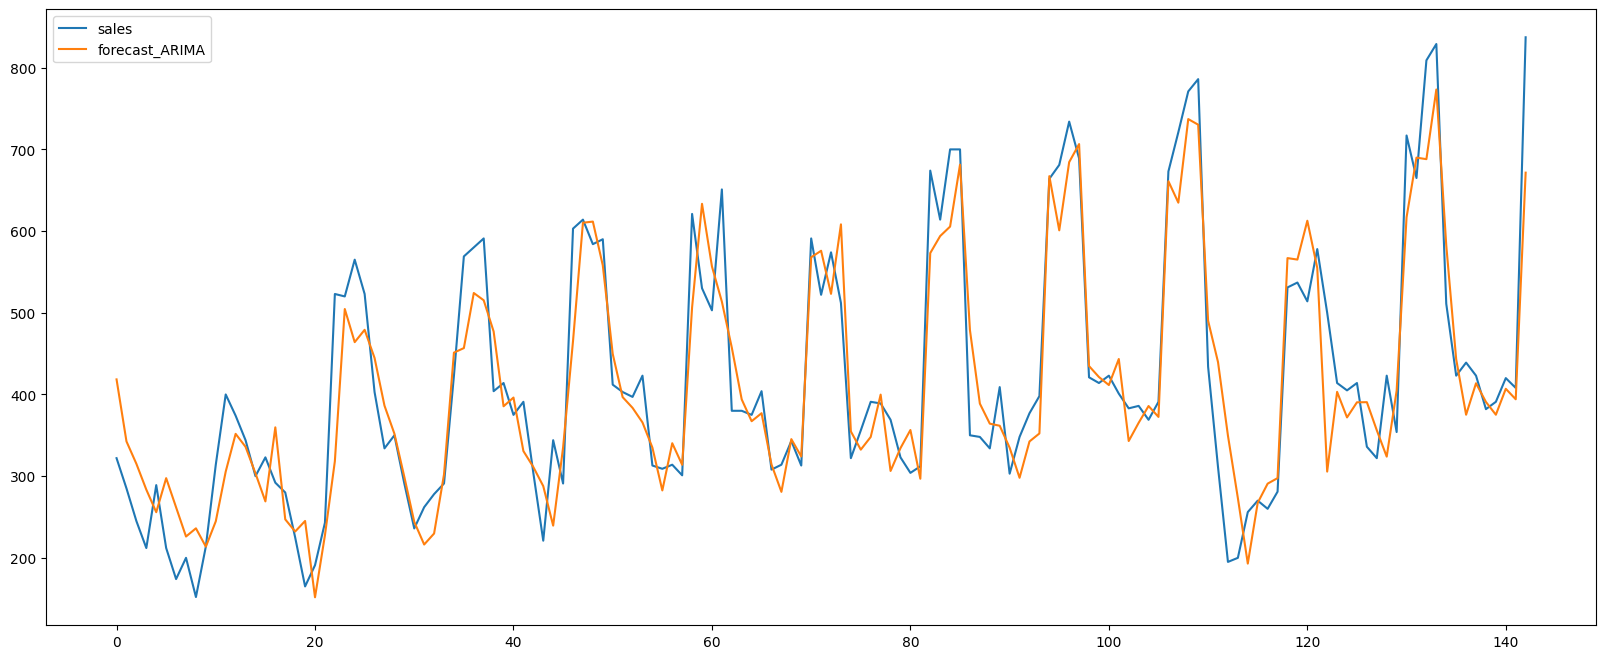

In [ ]:
# Fit the model
model_ARIMA = model_ARIMA.fit()

train_forecast = train.copy()
test_forecast = test.copy()

train_forecast['forecast_ARIMA'] = model_ARIMA.predict()
train_forecast[['sales','forecast_ARIMA']].plot(figsize=(20,8))

In [ ]:
#checking RMSE, MAE, MAPA values for train data

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

print("RMSE of Auto ARIMA:", np.sqrt(mean_squared_error(train_forecast['sales'], train_forecast['forecast_ARIMA'])))
print("MAE of Auto ARIMA:", mean_absolute_error(train_forecast['sales'], train_forecast['forecast_ARIMA']))
print("MAPA of Auto ARIMA:", mean_absolute_percentage_error(train_forecast['sales'], train_forecast['forecast_ARIMA']))

RMSE of Auto ARIMA: 62.63325613330588
MAE of Auto ARIMA: 48.12179468611912
MAPA of Auto ARIMA: 0.12732020938536742


#forcasting on test data

<Axes: >

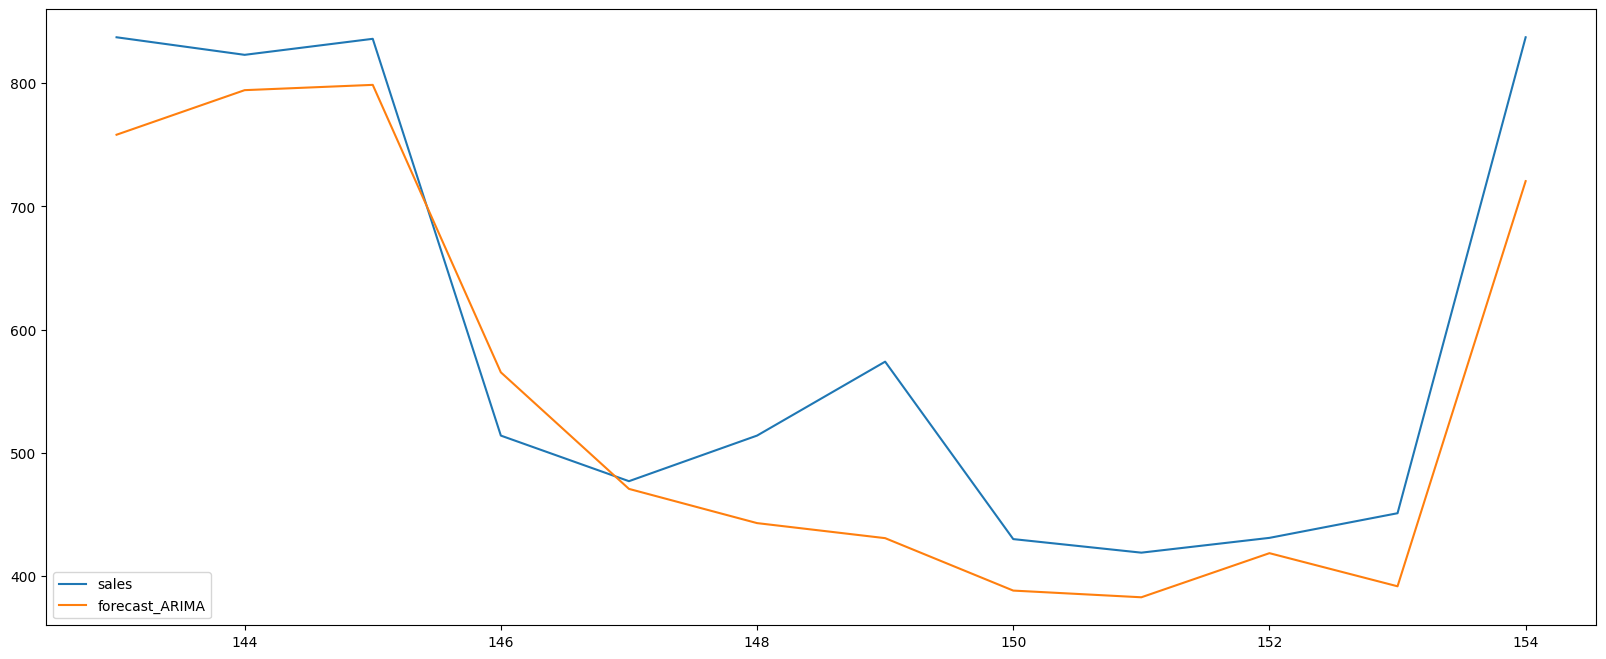

In [ ]:
# Forecast and compare against test data

# start date
start = len(train)

# End date
end = len(train)+len(test)-1

test_forecast['forecast_ARIMA'] = model_ARIMA.predict(start=start, end=end)
test_forecast[['sales','forecast_ARIMA']].plot(figsize=(20,8))

In [ ]:
#checking RMSE, MAE, MAPA values for test data

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

print("RMSE of Auto ARIMA:", np.sqrt(mean_squared_error(test_forecast['sales'], test_forecast['forecast_ARIMA'])))
print("MAE of Auto ARIMA:", mean_absolute_error(test_forecast['sales'], test_forecast['forecast_ARIMA']))
print("MAPE of Auto ARIMA:", mean_absolute_percentage_error(test_forecast['sales'], test_forecast['forecast_ARIMA']))

RMSE of Auto ARIMA: 68.95796075079929
MAE of Auto ARIMA: 56.95131180064937
MAPE of Auto ARIMA: 0.09650013203550152


# Forcasting for Demand

# Linear Model

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
150   NaN
151   NaN
152   NaN
153   NaN
154   NaN
Name: trend, Length: 155, dtype: float64
0      196.655545
1      173.608323
2      -35.593066
3      -57.300011
4      -68.038205
          ...    
150   -124.153483
151   -144.639594
152   -120.139594
153   -117.886122
154    186.843045
Name: seasonal, Length: 155, dtype: float64
0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
150   NaN
151   NaN
152   NaN
153   NaN
154   NaN
Name: resid, Length: 155, dtype: float64
0      346.0
1      338.0
2      276.0
3      245.0
4      312.0
       ...  
150    547.0
151    526.0
152    502.0
153    625.0
154    900.0
Name: demand, Length: 155, dtype: float64


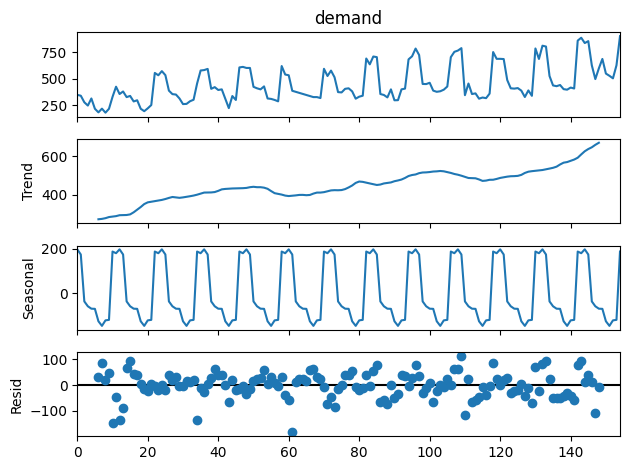

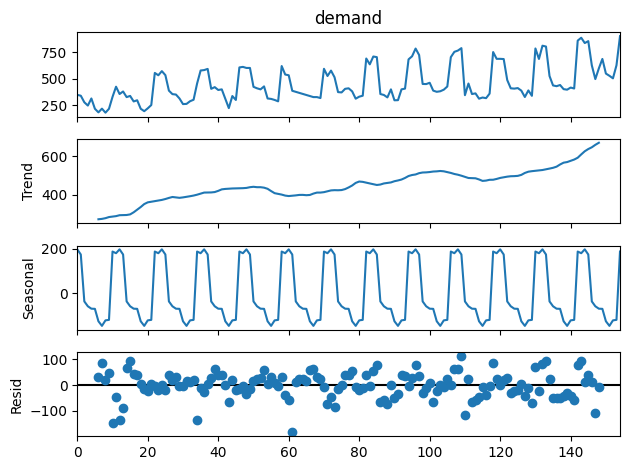

In [ ]:
# breaking up a time series into components, most notably: a trend component, a seasonal component, and a residual component

from statsmodels.tsa.seasonal import seasonal_decompose

decompose_ts_add1 = seasonal_decompose(cement['demand'], model = "additive", period = 12)
print(decompose_ts_add1.trend)
print(decompose_ts_add1.seasonal)
print(decompose_ts_add1.resid)
print(decompose_ts_add1.observed)
decompose_ts_add1.plot()

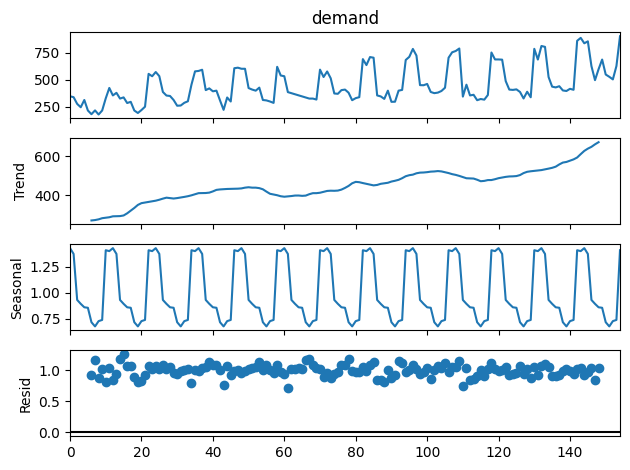

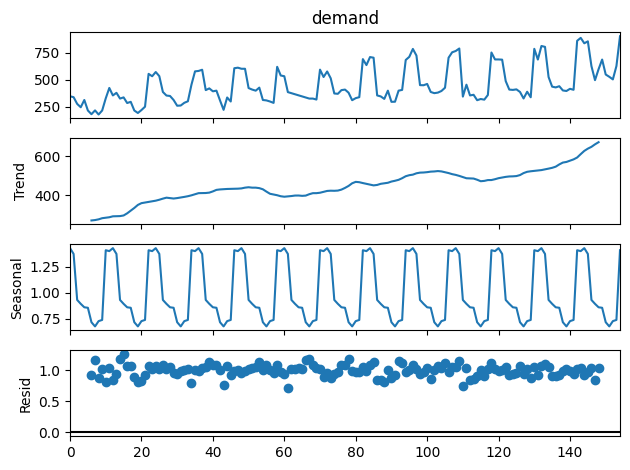

In [ ]:
decompose_ts_mul1 = seasonal_decompose(cement['demand'], model = "multiplicative", period = 12)
decompose_ts_mul1.plot()

In [ ]:
# filtering requied features for sales forecasting

cementdemand = cement.loc[:, ['Month','demand', 't']]
cementdemand.head()

Month  demand  t
0  Jan-10   346.0  1
1  Feb-10   338.0  2
2  Mar-10   276.0  3
3  Apr-10   245.0  4
4  May-10   312.0  5

In [ ]:
# squaring t value as it will further requied for model

cementdemand['tsquare'] = cementdemand['t'] * cementdemand['t']
cementdemand.head()

Month  demand  t  tsquare
0  Jan-10   346.0  1        1
1  Feb-10   338.0  2        4
2  Mar-10   276.0  3        9
3  Apr-10   245.0  4       16
4  May-10   312.0  5       25

In [ ]:
# taking the log of sales values as it will be required for the exponential model

cementdemand['log_cement'] = np.log(cementdemand['demand'])

cementdemand.head()

Month  demand  t  tsquare  log_cement
0  Jan-10   346.0  1        1    5.846439
1  Feb-10   338.0  2        4    5.823046
2  Mar-10   276.0  3        9    5.620401
3  Apr-10   245.0  4       16    5.501258
4  May-10   312.0  5       25    5.743003

In [ ]:
p3 = cementdemand["Month"][0]
p3[0:3]

cementdemand['months']= 0

for i in range(155):
    p3 = cementdemand["Month"][i]
    cementdemand['months'][i]= p3[0:3]

cementdemand

Month  demand    t  tsquare  log_cement months
0    Jan-10   346.0    1        1    5.846439    Jan
1    Feb-10   338.0    2        4    5.823046    Feb
2    Mar-10   276.0    3        9    5.620401    Mar
3    Apr-10   245.0    4       16    5.501258    Apr
4    May-10   312.0    5       25    5.743003    May
..      ...     ...  ...      ...         ...    ...
150  Jul-22   547.0  151    22801    6.304449    Jul
151  Aug-22   526.0  152    23104    6.265301    Aug
152  Sep-22   502.0  153    23409    6.218600    Sep
153  Oct-22   625.0  154    23716    6.437752    Oct
154  Nov-22   900.0  155    24025    6.802395    Nov

[155 rows x 6 columns]

In [ ]:
# converting months catagorical features to numeric columns by using pandas get_dummies function

month_dummies1 = pd.DataFrame(pd.get_dummies(cementdemand['months']))
month_dummies1.head()

Apr    Aug    Dec    Feb    Jan    Jul    Jun    Mar    May    Nov  \
0  False  False  False  False   True  False  False  False  False  False   
1  False  False  False   True  False  False  False  False  False  False   
2  False  False  False  False  False  False  False   True  False  False   
3   True  False  False  False  False  False  False  False  False  False   
4  False  False  False  False  False  False  False  False   True  False   

     Oct    Sep  
0  False  False  
1  False  False  
2  False  False  
3  False  False  
4  False  False

In [ ]:
# concating data

cementdemand1 = pd.concat([cementdemand, month_dummies1], axis= 1)
cementdemand1.head()

Month  demand  t  tsquare  log_cement months    Apr    Aug    Dec    Feb  \
0  Jan-10   346.0  1        1    5.846439    Jan  False  False  False  False   
1  Feb-10   338.0  2        4    5.823046    Feb  False  False  False   True   
2  Mar-10   276.0  3        9    5.620401    Mar  False  False  False  False   
3  Apr-10   245.0  4       16    5.501258    Apr   True  False  False  False   
4  May-10   312.0  5       25    5.743003    May  False  False  False  False   

     Jan    Jul    Jun    Mar    May    Nov    Oct    Sep  
0   True  False  False  False  False  False  False  False  
1  False  False  False  False  False  False  False  False  
2  False  False  False   True  False  False  False  False  
3  False  False  False  False  False  False  False  False  
4  False  False  False  False   True  False  False  False

In [ ]:
cementdemand1.shape

(155, 18)

In [ ]:
# splitting data into train & test

train1 = cementdemand1.head(143)
test1 = cementdemand1.tail(12)

In [ ]:
print(train1.shape)
print(test1.shape)

(143, 18)
(12, 18)


In [ ]:
train1.head()

Month  demand  t  tsquare  log_cement months    Apr    Aug    Dec    Feb  \
0  Jan-10   346.0  1        1    5.846439    Jan  False  False  False  False   
1  Feb-10   338.0  2        4    5.823046    Feb  False  False  False   True   
2  Mar-10   276.0  3        9    5.620401    Mar  False  False  False  False   
3  Apr-10   245.0  4       16    5.501258    Apr   True  False  False  False   
4  May-10   312.0  5       25    5.743003    May  False  False  False  False   

     Jan    Jul    Jun    Mar    May    Nov    Oct    Sep  
0   True  False  False  False  False  False  False  False  
1  False  False  False  False  False  False  False  False  
2  False  False  False   True  False  False  False  False  
3  False  False  False  False  False  False  False  False  
4  False  False  False  False   True  False  False  False

In [ ]:
test1.tail()

Month  demand    t  tsquare  log_cement months    Apr    Aug    Dec  \
150  Jul-22   547.0  151    22801    6.304449    Jul  False  False  False   
151  Aug-22   526.0  152    23104    6.265301    Aug  False   True  False   
152  Sep-22   502.0  153    23409    6.218600    Sep  False  False  False   
153  Oct-22   625.0  154    23716    6.437752    Oct  False  False  False   
154  Nov-22   900.0  155    24025    6.802395    Nov  False  False  False   

       Feb    Jan    Jul    Jun    Mar    May    Nov    Oct    Sep  
150  False  False   True  False  False  False  False  False  False  
151  False  False  False  False  False  False  False  False  False  
152  False  False  False  False  False  False  False  False   True  
153  False  False  False  False  False  False  False   True  False  
154  False  False  False  False  False  False   True  False  False

In [ ]:
#importing linear Model, error matrix for error calculation
#checking different models for better accuracy

import statsmodels.formula.api as api
from sklearn.metrics import mean_absolute_percentage_error

#Linear Model

linear_model1 = api.ols('demand ~ t', data = train1).fit()
pred_linear1 =  pd.Series(linear_model1.predict(pd.DataFrame(test1['t'])))
rmse_linear1 = np.sqrt(np.mean((np.array(test1['demand']) - np.array(pred_linear1))**2))
mapa_linear1 = mean_absolute_percentage_error(test1['demand'], pd.DataFrame(pred_linear1))

print('mapa : ', mapa_linear1)
print('rmse : ',rmse_linear1)

mapa :  0.18596322680413638
rmse :  187.74653841829607


In [ ]:
# Exponential Model

Exp1 = api.ols('log_cement ~ t', data = train1).fit()
pred_Exp1 = pd.Series(Exp1.predict(pd.DataFrame(test1['t'])))
rmse_Exp1 = np.sqrt(np.mean((np.array(test1['demand']) - np.array(np.exp(pred_Exp1)))**2))
mapa_Exp1 = mean_absolute_percentage_error(test1['demand'], pd.DataFrame(np.exp(pred_Exp1)))

print('mapa : ', mapa_Exp1)
print('rmse : ', rmse_Exp1)

mapa :  0.18888528362449963
rmse :  193.20820733946567


In [ ]:
#quadratic model

Quad1 = api.ols('demand ~ t + tsquare', data = train1).fit()
pred_Quad1 = pd.Series(Quad1.predict(test1[["t", "tsquare"]]))
rmse_Quad1 = np.sqrt(np.mean((np.array(test1['demand']) - np.array(pred_Quad1))**2))
mapa_Quad1 = mean_absolute_percentage_error(test1['demand'], pd.DataFrame(pred_Quad1))

print('mapa : ', mapa_Quad1)
print('rmse : ', rmse_Quad1)


mapa :  0.20729351089310863
rmse :  215.3926398843102


In [ ]:
# Additive Seasonality

add_sea1 = api.ols('demand ~ Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov', data=train1).fit()
pred_add_sea1 = pd.Series(add_sea1.predict(test1[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea1 = np.sqrt(np.mean((np.array(test1['demand']) - np.array(pred_add_sea1))**2))
mapa_add_sea1 = mean_absolute_percentage_error(test1['demand'], pd.DataFrame(pred_add_sea1))

print('mapa : ', mapa_add_sea1)
print('rmse : ', rmse_add_sea1)


mapa :  0.36101007538991076
rmse :  244.48991873687038


In [ ]:
# Multiplicative Model

Mul_sea1 = api.ols('log_cement ~ Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = train1).fit()
pred_Mult_sea1 = pd.Series(Mul_sea1.predict(test1))
rmse_Mult_sea1 = np.sqrt(np.mean((np.array(test1['demand']) - np.array(np.exp(pred_Mult_sea1)))**2))
mapa_Mult_sea1 = mean_absolute_percentage_error(test1['demand'], pd.DataFrame(np.exp(pred_Mult_sea1)))

print('mapa : ', mapa_Mult_sea1)
print('rmse : ', rmse_Mult_sea1)


mapa :  0.37470326925565783
rmse :  254.24155047366796


In [ ]:
# Additive seasionality quadratic trend

add_sea_Quad1 = api.ols('demand ~ t+tsquare+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train1).fit()
pred_add_sea_quad1 = pd.Series(add_sea_Quad1.predict(test1[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','tsquare']]))
rmse_add_sea_quad1 = np.sqrt(np.mean((np.array(test1['demand'])-np.array(pred_add_sea_quad1))**2))
mapa_add_sea_quad1 = mean_absolute_percentage_error(test1['demand'], pd.DataFrame(pred_add_sea_quad1))

print('mapa : ', mapa_add_sea_quad1)
print('rmse : ', rmse_add_sea_quad1)

mapa :  0.2125180732747751
rmse :  153.14682596762842


In [ ]:
# Multiplicative seasonality linear trend

Mul_Add_sea1 = api.ols('log_cement ~ t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = train1).fit()
pred_Mult_add_sea1 = pd.Series(Mul_Add_sea1.predict(test1))
rmse_Mult_add_sea1 = np.sqrt(np.mean((np.array(test1['demand'])-np.array(np.exp(pred_Mult_add_sea1)))**2))
mapa_Mult_add_sea1 = mean_absolute_percentage_error(test1['demand'], pd.DataFrame(np.exp(pred_Mult_add_sea1)))

print('mapa : ', mapa_Mult_add_sea1)
print('rmse : ', rmse_Mult_add_sea1)

mapa :  0.1472256691730365
rmse :  106.18787091660728


In [ ]:
# concating data of model, rmse, mapa values so as to select appropriate model for better accuracy

data1 = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),
        "RMSE_Values":pd.Series([rmse_linear,rmse_Exp1,rmse_Quad1,rmse_add_sea1,rmse_add_sea_quad1,rmse_Mult_sea1,rmse_Mult_add_sea1]),
       "MAPA_Values": pd.Series([mapa_linear1,mapa_Exp,mapa_Quad1,mapa_add_sea1,mapa_add_sea_quad1,mapa_Mult_sea1,mapa_Mult_add_sea1])}
table_rmse_mapa1 = pd.DataFrame(data1)
table_rmse_mapa1

MODEL  RMSE_Values  MAPA_Values
0        rmse_linear   186.905716     0.185963
1           rmse_Exp   193.208207     0.215100
2          rmse_Quad   215.392640     0.207294
3       rmse_add_sea   244.489919     0.361010
4  rmse_add_sea_quad   153.146826     0.212518
5      rmse_Mult_sea   254.241550     0.374703
6  rmse_Mult_add_sea   106.187871     0.147226

from above table we can say that, RMSE_values, MAPA_values for Multiplicative seasonality linear trend model giving us less error, so we can use this model for our prediction

# ARIMA Model

In [ ]:
#importing auto arima so as to get values of (p, d, q) for Arima model

from pmdarima import auto_arima


In [ ]:
# Run combinations of ARIMA(p,d,q)
model_fit1 = auto_arima(train1['demand'],
                       m=12,
                       d=0,
                       D=0,
                       max_order=None,
                       max_p=7,
                       max_q=7,
                       max_d=2,
                       max_P=4,
                       max_Q=4,
                       max_D=2,
                       maxiter = 50,
                       alpha = 0.05,
                       n_jobs = -1,
                       seasonal=True,
                       trace=True,
                       error_action='ignore',
                       suppress_warnings=True,
                       stepwise=True
                      )
model_fit1.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=1653.330, Time=1.33 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1855.921, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1614.586, Time=0.60 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1724.695, Time=0.61 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2161.605, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1768.305, Time=0.04 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=inf, Time=3.44 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=1600.746, Time=1.08 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=1696.704, Time=0.41 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.46 sec
 ARIMA(1,0,0)(1,0,2)[12] intercept   : AIC=1603.057, Time=1.69 sec
 ARIMA(1,0,0)(0,0,2)[12] intercept   : AIC=1660.818, Time=1.27 sec
 ARIMA(1,0,0)(2,0,2)[12] intercept   : AIC=inf, Time=2.28 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=1651.794, Time=0.71 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  143
Model:             SARIMAX(2, 0, 0)x(1, 0, [1], 12)   Log Likelihood                -787.465
Date:                              Tue, 14 May 2024   AIC                           1586.930
Time:                                      18:53:56   BIC                           1604.707
Sample:                                           0   HQIC                          1594.154
                                              - 143                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.2064      4.431      0.724      0.469      -5.478      11.891
ar.L1          0.4132      0.079      5.248      0.000       0.259       0.568
ar.L2          0.3314      0.081      4.076      0.000       0.172       0.491
ar.S.L12       0.9702      0.029     34.033      0.000       0.914       1.026
ma.S.L12      -0.4715      0.112     -4.193      0.000      -0.692      -0.251
sigma2      3017.5686    364.944      8.269      0.000    2302.292    3732.846
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 8.88
Prob(Q):                              0.89   Prob(JB):                         0.01
Heteroskedasticity (H):               1.08   Skew:                            -0.07
Prob(H) (two-sided):                  0.78   Kurtosis:                         4.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model_fit1

ARIMA(order=(2, 0, 0), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit the ARIMA model

model_ARIMA1 = ARIMA(train1['demand'],
              order=(2,0,0),
              seasonal_order=(1, 0, 1, 12))

<Axes: >

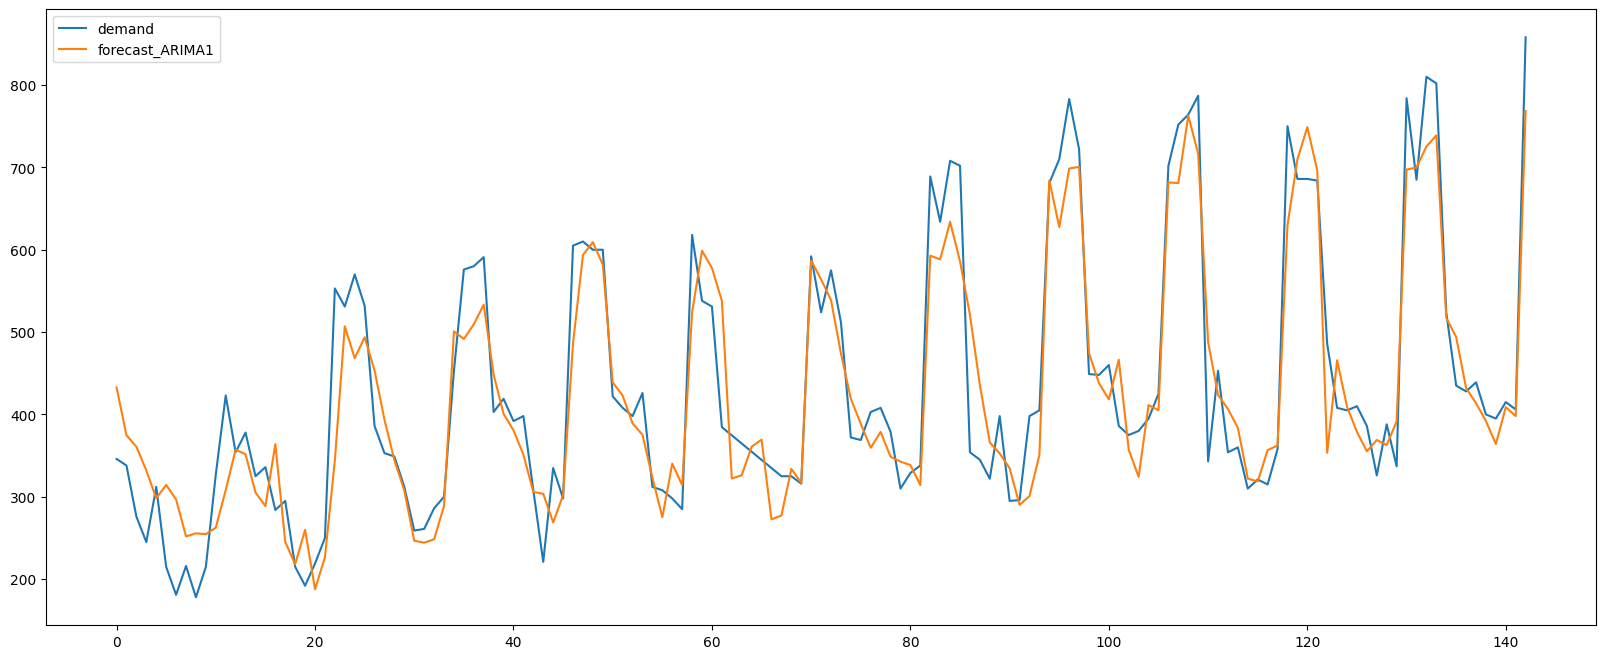

In [ ]:
# Fit the model
model_ARIMA1 = model_ARIMA1.fit()

train_forecast1 = train1.copy()
test_forecast1 = test1.copy()

train_forecast1['forecast_ARIMA1'] = model_ARIMA1.predict()
train_forecast1[['demand','forecast_ARIMA1']].plot(figsize=(20,8))

In [ ]:
#checking RMSE, MAE, MAPA values for train data

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

print("RMSE of Auto ARIMA:", np.sqrt(mean_squared_error(train_forecast1['demand'], train_forecast1['forecast_ARIMA1'])))
print("MAE of Auto ARIMA:", mean_absolute_error(train_forecast1['demand'], train_forecast1['forecast_ARIMA1']))
print("MAPA of Auto ARIMA:", mean_absolute_percentage_error(train_forecast1['demand'], train_forecast1['forecast_ARIMA1']))

RMSE of Auto ARIMA: 59.252978575787914
MAE of Auto ARIMA: 45.65218537465473
MAPA of Auto ARIMA: 0.11622223340012892


#forcasting on test data

<Axes: >

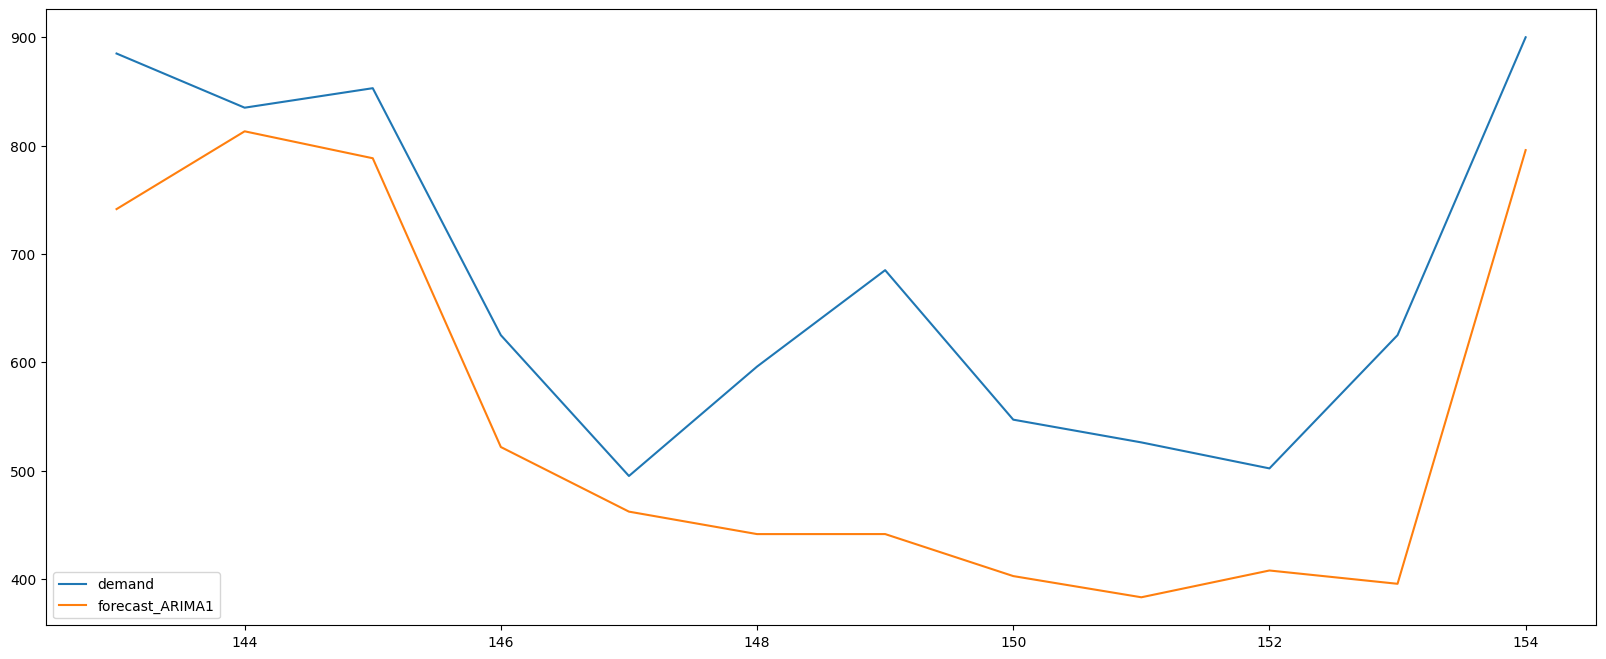

In [ ]:
# Forecast and compare against test data

# start date
start1 = len(train1)

# End date
end1 = len(train1)+len(test1)-1

test_forecast1['forecast_ARIMA1'] = model_ARIMA1.predict(start=start1, end=end1)
test_forecast1[['demand','forecast_ARIMA1']].plot(figsize=(20,8))


In [ ]:
#checking RMSE, MAE, MAPA values for test data

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

print("RMSE of Auto ARIMA:", np.sqrt(mean_squared_error(test_forecast1['demand'], test_forecast1['forecast_ARIMA1'])))
print("MAE of Auto ARIMA:", mean_absolute_error(test_forecast1['demand'], test_forecast1['forecast_ARIMA1']))
print("MAPE of Auto ARIMA:", mean_absolute_percentage_error(test_forecast1['demand'], test_forecast1['forecast_ARIMA1']))

RMSE of Auto ARIMA: 139.6468738463557
MAE of Auto ARIMA: 123.32360489315666
MAPE of Auto ARIMA: 0.1931354461524443


#XGBoost

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

#Create months and day  feature

In [101]:
# CHECK

df = pd.read_csv('https://raw.githubusercontent.com/rashmikb26/CementSalesForecasting/main/89cement%20data%20.csv?token=GHSAT0AAAAAACSFEYOKBEPGBDKGL7EGMAMAZSHUHWQ')
import datetime

#Create month  feature

p3 = df["Month"][0]
p3[0:3]
df['months']= 0

for i in range(155):
    p3 = df["Month"][i]
    df['months'][i]= p3[0:3]

df.set_index('months', drop=False, inplace=True)
df



<ipython-input-101-8b4b67bd9852>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['months'][i]= p3[0:3]


Month  Production  Sales   demand  population       gdp  disbusment  \
months                                                                         
Jan     Jan-10       347.0   322.0   346.0       122.4  182277.0    60314.00   
Feb     Feb-10       306.0   285.0   338.0       122.5  181018.0    61213.92   
Mar     Mar-10       236.0   245.0   276.0       122.6  179759.0    62113.83   
Apr     Apr-10       234.0   212.0   245.0       122.8  178500.0    63013.75   
May     May-10       296.0   289.0   312.0       122.9  177354.0    63913.67   
...        ...         ...     ...     ...         ...       ...         ...   
0          NaN         NaN     NaN     NaN         NaN       NaN         NaN   
0          NaN         NaN     NaN     NaN         NaN       NaN         NaN   
0          NaN         NaN     NaN     NaN         NaN       NaN         NaN   
0          NaN         NaN     NaN     NaN         NaN       NaN         NaN   
0          NaN         NaN     NaN     NaN         NaN       NaN         NaN   

        interestrate  Unnamed: 8  Unnamed: 9  Unnamed: 10  Unnamed: 11  \
months                                                                   
Jan            10.25         NaN         NaN          NaN          NaN   
Feb            10.33         NaN         NaN          NaN          NaN   
Mar            10.42         NaN         NaN          NaN          NaN   
Apr            10.50         NaN         NaN          NaN          NaN   
May            10.58         NaN         NaN          NaN          NaN   
...              ...         ...         ...          ...          ...   
0                NaN         NaN         NaN          NaN          NaN   
0                NaN         NaN         NaN          NaN          NaN   
0                NaN         NaN         NaN          NaN          NaN   
0                NaN         NaN         NaN          NaN          NaN   
0                NaN         NaN         NaN          NaN          NaN   

        Unnamed: 12  Unnamed: 13 months  
months                                   
Jan             NaN          NaN    Jan  
Feb             NaN          NaN    Feb  
Mar             NaN          NaN    Mar  
Apr             NaN          NaN    Apr  
May             NaN          NaN    May  
...             ...          ...    ...  
0               NaN          NaN      0  
0               NaN          NaN      0  
0               NaN          NaN      0  
0               NaN          NaN      0  
0               NaN          NaN      0  

[999 rows x 15 columns]

In [102]:
df = pd.read_csv('https://raw.githubusercontent.com/rashmikb26/CementSalesForecasting/main/89cement%20data%20.csv?token=GHSAT0AAAAAACSFEYOKBEPGBDKGL7EGMAMAZSHUHWQ')
import datetime

#Create day  feature

p3 = df["Month"][0]
p3[4:6]
df['day']= 0

for i in range(155):
    p3 = df["Month"][i]
    df['day'][i]= p3[4:6]

df.set_index('day', drop=False, inplace=True)
df

<ipython-input-102-afb25aafe0d4>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day'][i]= p3[4:6]


Month  Production  Sales   demand  population       gdp  disbusment  \
day                                                                         
10   Jan-10       347.0   322.0   346.0       122.4  182277.0    60314.00   
10   Feb-10       306.0   285.0   338.0       122.5  181018.0    61213.92   
10   Mar-10       236.0   245.0   276.0       122.6  179759.0    62113.83   
10   Apr-10       234.0   212.0   245.0       122.8  178500.0    63013.75   
10   May-10       296.0   289.0   312.0       122.9  177354.0    63913.67   
..      ...         ...     ...     ...         ...       ...         ...   
0       NaN         NaN     NaN     NaN         NaN       NaN         NaN   
0       NaN         NaN     NaN     NaN         NaN       NaN         NaN   
0       NaN         NaN     NaN     NaN         NaN       NaN         NaN   
0       NaN         NaN     NaN     NaN         NaN       NaN         NaN   
0       NaN         NaN     NaN     NaN         NaN       NaN         NaN   

     interestrate  Unnamed: 8  Unnamed: 9  Unnamed: 10  Unnamed: 11  \
day                                                                   
10          10.25         NaN         NaN          NaN          NaN   
10          10.33         NaN         NaN          NaN          NaN   
10          10.42         NaN         NaN          NaN          NaN   
10          10.50         NaN         NaN          NaN          NaN   
10          10.58         NaN         NaN          NaN          NaN   
..            ...         ...         ...          ...          ...   
0             NaN         NaN         NaN          NaN          NaN   
0             NaN         NaN         NaN          NaN          NaN   
0             NaN         NaN         NaN          NaN          NaN   
0             NaN         NaN         NaN          NaN          NaN   
0             NaN         NaN         NaN          NaN          NaN   

     Unnamed: 12  Unnamed: 13 day  
day                                
10           NaN          NaN  10  
10           NaN          NaN  10  
10           NaN          NaN  10  
10           NaN          NaN  10  
10           NaN          NaN  10  
..           ...          ...  ..  
0            NaN          NaN   0  
0            NaN          NaN   0  
0            NaN          NaN   0  
0            NaN          NaN   0  
0            NaN          NaN   0  

[999 rows x 15 columns]

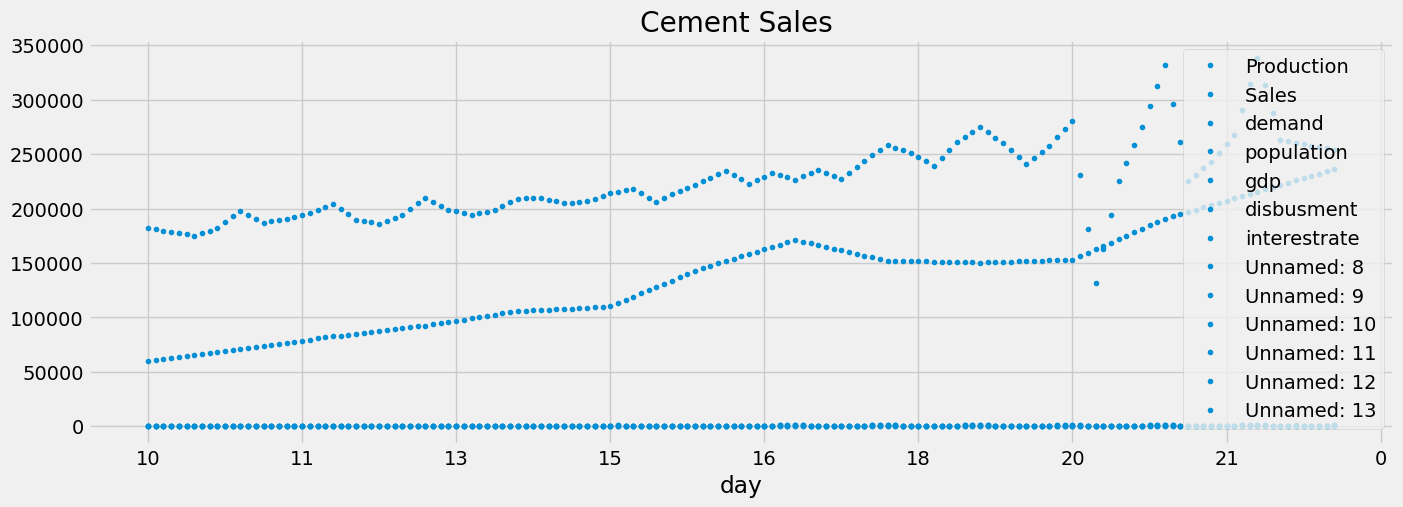

In [103]:
df.plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='Cement Sales ')
plt.show()

Train / Test Split

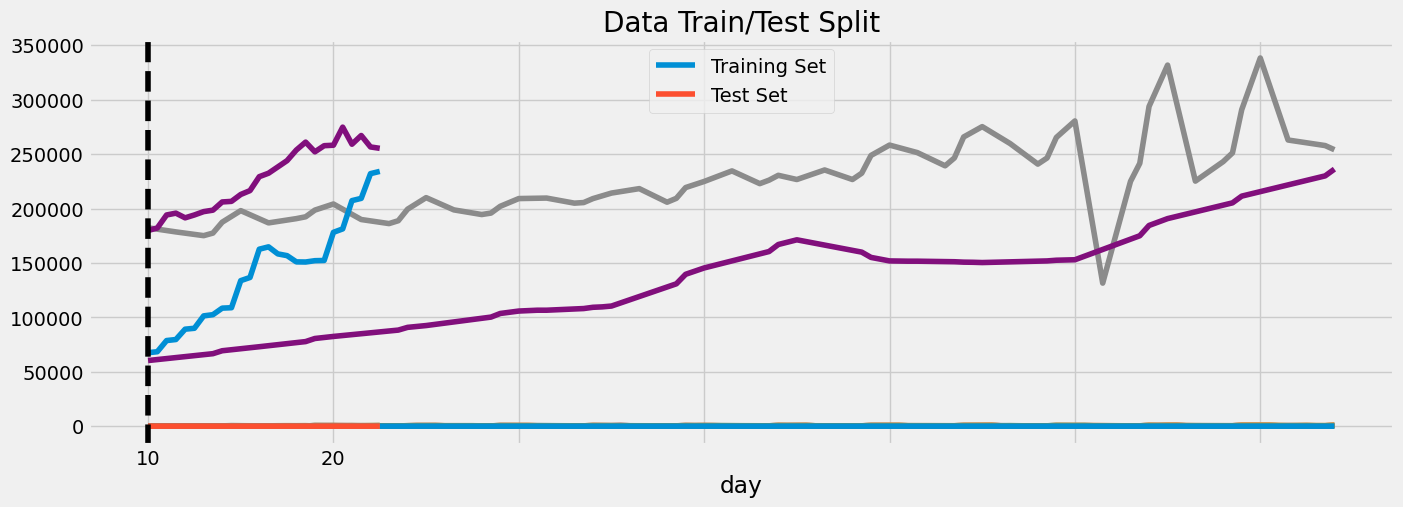

In [104]:
train = df.loc[ df['Month'] < 'Oct-10']
test = df.loc[df['Month'] >= 'Oct-10']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('Oct-2010', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

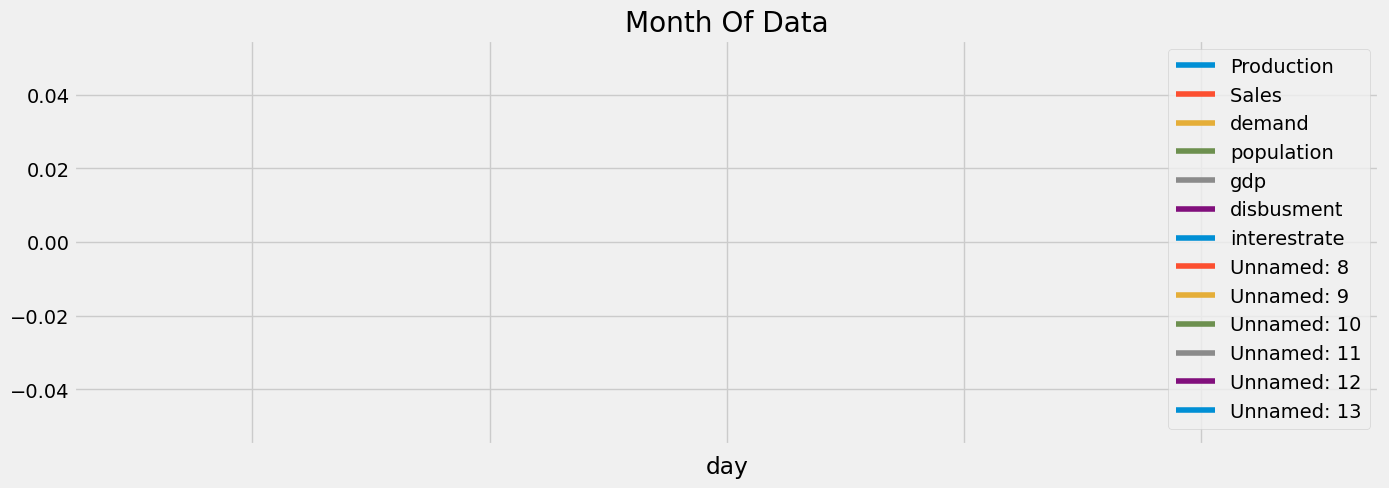

In [105]:
df.loc[ (df['Month'] > 'Oct-10') & ( df['Month'] < 'Oct-10')] \
    .plot(figsize=(15, 5), title='Month Of Data')
plt.show()

Feature Creation

In [107]:
def create_features(df):

    #Create time series features based on time series index.
    df = pd.read_csv('https://raw.githubusercontent.com/rashmikb26/CementSalesForecasting/main/89cement%20data%20.csv?token=GHSAT0AAAAAACSFEYOKBEPGBDKGL7EGMAMAZSHUHWQ')

    df['Month'] = df.Month
    df['Production'] = df.Production
    #df['Sales'] =  df.Sales
    df['demand'] = df.demand
    df['population'] = df.population
    df['gdp'] = df.gdp
    df['disbusment'] = df.disbusment
    df['interestrate'] = df.interestrate
    df['months'] = df.Month[0:2]
    df['day'] = df.Month[4:5]
    return df

df1 = create_features(df)
#df1


Visualize our Feature / Target Relationship

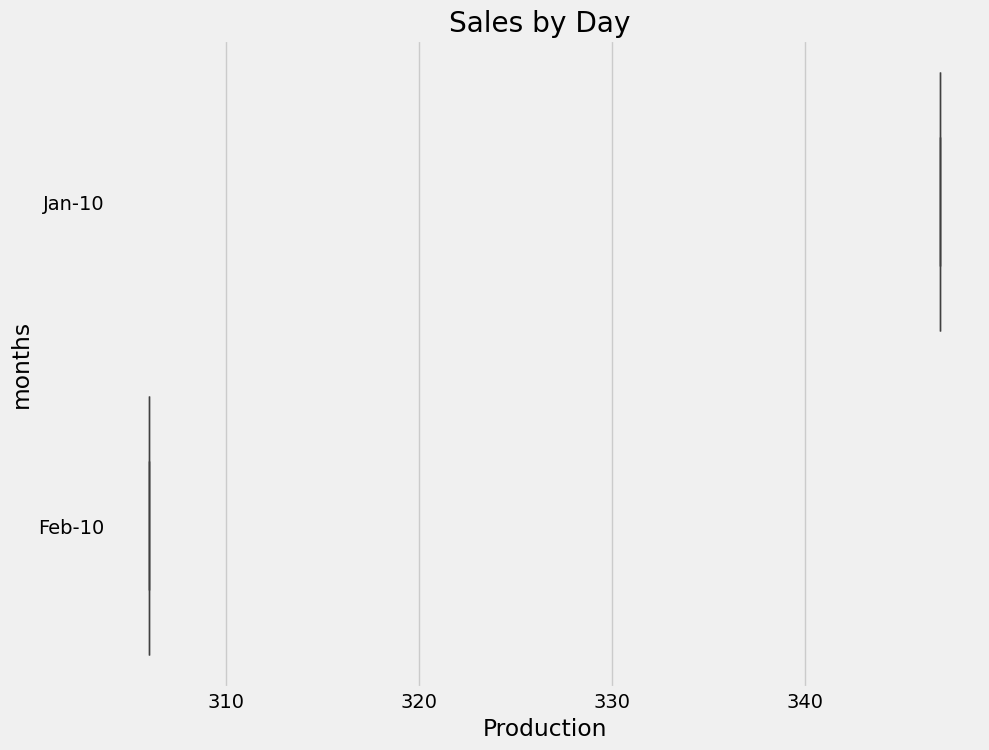

In [108]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df1, x='Production', y='months')
ax.set_title('Sales by Day ')
plt.show()

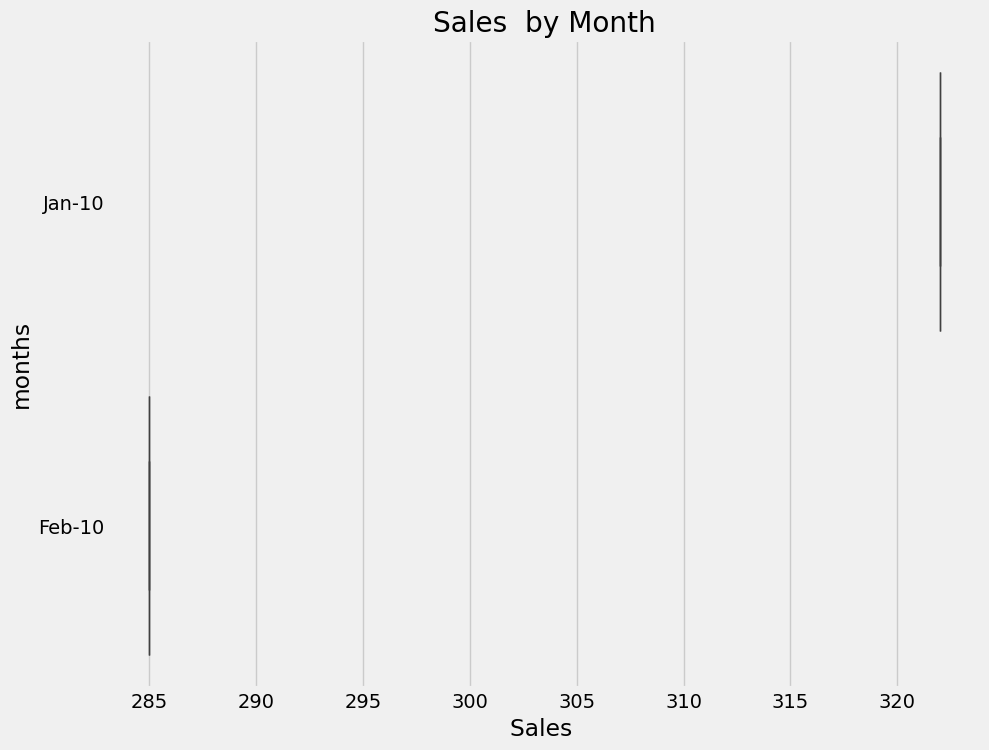

In [109]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df1, x='Sales ', y='months')
ax.set_title('Sales  by Month')
plt.show()

Create our Model

In [110]:
train = df1.loc[df['months'] < 'Oct']
test = df1.loc[df['months'] >= 'Oct']

train = create_features(train)
test = create_features(test)

FEATURES = ['day', 'months']
TARGET = 'Cement Sales'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]


KeyError: 'months'

In [97]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,eval_set=[(X_train, y_train), (X_test, y_test)],verbose=100)

NameError: name 'y_train' is not defined

Feature Importance

In [ ]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

Forecast on Test

In [ ]:
test['prediction'] = reg.predict(X_test)
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = df[['PJME_MW']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

In [ ]:
ax = df.loc[(df.index > '04-01-2018') & (df.index < '04-08-2018')]['PJME_MW'] \
    .plot(figsize=(15, 5), title='Week Of Data')
df.loc[(df.index > '04-01-2018') & (df.index < '04-08-2018')]['prediction'] \
    .plot(style='.')
plt.legend(['Truth Data','Prediction'])
plt.show()

Score (RMSE)

In [ ]:
score = np.sqrt(mean_squared_error(test['PJME_MW'], test['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

Calculate **Error**
Look at the worst and best predicted days

In [ ]:
test['error'] = np.abs(test[TARGET] - test['prediction'])
test['date'] = test.index.date
test.groupby(['date'])['error'].mean().sort_values(ascending=False).head(10)

In [ ]:
test['error'] = np.abs(test[TARGET] - test['prediction'])
test['date'] = test.index.date
test.groupby(['date'])['error'].mean().sort_values(ascending=False).head(10)

Next Steps
More robust cross validation
Add more features (weather forecast, holidays)
The End